# **Библиотеки**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# **Первичный EDA-Анализ**

### Загрузка и чтение нашего файла + переименование на русский язык (так легче воспринимать и не надо 5000 раз лазить в методичку)

In [59]:
df = pd.read_csv('kicksharing.csv')
rename_map = {
    "order_rk" : "Индификатор поездки", 
    "party_rk" : "Индификатор клиента",
    "gender_cd" : "Пол клиента", 
    "age" : "Возраст", 
    "education_level_cd" : "Уровень образования", 
    "marital_status_cd" : "Семейный статус", 
    "lvn_state_nm" : "Область", 
    "minute_cost" : "Стоимость минуты", 
    "activation_cost" : "Старт аренды", 
    "hold_amount" : "Размер замороженных средств", 
    "transport_model" : "Название модели самоката", 
    "distance_km" : "Километраж поездки",
    "created_dttm" : "Дата и время создания заказа",
    "book_start_dttm" : "Дата и время начала поездки",
    "book_end_dttm" : "Дата и время окончания поездки",
    "book_time_zone_cd" : "Часовой пояс", 
    "local_book_start_dttm" : "Местное время начала поездки",
    "nominal_price_rub_amt" : "Стоимость поездки", 
    "loyalty_accrual_rub_amt" : "Кэшбэк в рублях",
    "loyalty_accrual_bns_amt" : "Кэшбэк в бонусах"
}
df.rename(columns=rename_map, inplace=True)
df

Индификатор поездки  Индификатор клиента Пол клиента  Возраст  \
0                 266071307            761067705           M       40   
1                 355113920            614049469           F       30   
2                 347424551            757583701           M       28   
3                 351562959            541367366           M       24   
4                 258647149            238473615           M       34   
...                     ...                  ...         ...      ...   
396744            349109813            755778419           M       18   
396745            348829245           1146263947           M       23   
396746            273529251           1012601147           M       20   
396747            306062051            863877659           M       19   
396748            262579355            897372192           M       33   

       Уровень образования Семейный статус              Область  \
0                      UGR             DIV        ТЮМЕНСКАЯ ОБЛ   
1                      GRD             MAR       РОСТОВСКАЯ ОБЛ   
2                      UGR             UNM     СВЕРДЛОВСКАЯ ОБЛ   
3                      GRD             UNM             Г МОСКВА   
4                      NaN             NaN             Г МОСКВА   
...                    ...             ...                  ...   
396744                 NaN             NaN     СВЕРДЛОВСКАЯ ОБЛ   
396745                 NaN             NaN  КАЛИНИНГРАДСКАЯ ОБЛ   
396746                 NaN             NaN        ТЮМЕНСКАЯ ОБЛ   
396747                 NaN             NaN    Г САНКТ-ПЕТЕРБУРГ   
396748                 GRD             UNM             Г МОСКВА   

        Стоимость минуты  Старт аренды  Размер замороженных средств  \
0                   4.99          30.0                        300.0   
1                   8.49          50.0                        300.0   
2                   5.99          30.0                        300.0   
3                   8.99          50.0                        300.0   
4                   6.99          50.0                        300.0   
...                  ...           ...                          ...   
396744              6.49          30.0                        300.0   
396745              8.99          30.0                        300.0   
396746              8.79          50.0                        300.0   
396747              7.49          50.0                        300.0   
396748              8.08          50.0                        300.0   

       Название модели самоката  Километраж поездки  \
0                            SL            3.690479   
1                            SL            1.114912   
2                             E            1.515612   
3                            SL            0.499411   
4                            SL            2.602028   
...                         ...                 ...   
396744                        E            1.555069   
396745                      Max            2.270902   
396746                        E            1.411171   
396747                       SL            1.002400   
396748                       SL            0.914210   

       Дата и время создания заказа Дата и время начала поездки  \
0        2024-08-07 09:47:25.000000  2024-08-07 09:47:29.325252   
1        2024-10-17 14:57:20.000000  2024-10-17 14:57:24.586000   
2        2024-09-19 05:31:41.000000  2024-09-19 05:34:59.476000   
3        2024-10-04 16:05:09.000000  2024-10-04 16:05:13.162000   
4        2024-07-10 06:57:40.000000  2024-07-10 06:57:43.017125   
...                             ...                         ...   
396744   2024-09-25 11:39:42.000000  2024-09-25 11:39:46.885000   
396745   2024-09-24 20:05:43.000000  2024-09-24 20:05:46.954000   
396746   2024-09-03 16:07:43.000000  2024-09-03 16:07:45.311487   
396747   2024-09-12 18:28:48.000000  2024-09-12 18:28:50.401000   
396748   2024-07-25 07:44:07.000000  2024-07-25 07:44:10.998103   

       

# Общая информация о наших данных (самый базовый анализ)

In [60]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Индификатор поездки             396749 non-null  int64  
 1   Индификатор клиента             396749 non-null  int64  
 2   Пол клиента                     393828 non-null  object 
 3   Возраст                         396749 non-null  int64  
 4   Уровень образования             190059 non-null  object 
 5   Семейный статус                 217729 non-null  object 
 6   Область                         362572 non-null  object 
 7   Стоимость минуты                396749 non-null  float64
 8   Старт аренды                    396749 non-null  float64
 9   Размер замороженных средств     396749 non-null  float64
 10  Название модели самоката        396749 non-null  object 
 11  Километраж поездки              396749 non-null  float64
 12  Дата и время соз

None

In [61]:
display(df.describe().T)

count          mean           std  \
Индификатор поездки          396749.0  2.892236e+08  3.813458e+07   
Индификатор клиента          396749.0  5.988426e+08  3.311675e+08   
Возраст                      396749.0  3.154401e+01  9.434545e+00   
Стоимость минуты             396749.0  7.288688e+00  1.289492e+00   
Старт аренды                 396749.0  4.259323e+01  1.198997e+01   
Размер замороженных средств  396749.0  2.999839e+02  1.939153e+00   
Километраж поездки           396749.0  3.681031e+00  1.418623e+02   
Часовой пояс                 396749.0  3.536155e+00  1.209075e+00   
Стоимость поездки            396749.0  1.276477e+02  1.001224e+02   
Кэшбэк в рублях              366992.0  3.751612e+01  7.520856e+01   
Кэшбэк в бонусах              21948.0  1.277893e+02  4.968121e+02   

                                      min           25%           50%  \
Индификатор поездки          2.526112e+08  2.618150e+08  2.704367e+08   
Индификатор клиента          1.471700e+04  2.962323e+08  6.110092e+08   
Возраст                      1.200000e+01  2.400000e+01  3.100000e+01   
Стоимость минуты             1.500000e+00  6.490000e+00  7.490000e+00   
Старт аренды                 0.000000e+00  3.000000e+01  5.000000e+01   
Размер замороженных средств  8.000000e+01  3.000000e+02  3.000000e+02   
Километраж поездки           0.000000e+00  9.410537e-01  1.729883e+00   
Часовой пояс                 0.000000e+00  3.000000e+00  3.000000e+00   
Стоимость поездки            0.000000e+00  8.084000e+01  1.039400e+02   
Кэшбэк в рублях             -1.619400e+02  1.124000e+01  1.873000e+01   
Кэшбэк в бонусах             1.000000e+00  4.300000e+01  6.200000e+01   

                                      75%           max  
Индификатор поездки          3.432678e+08  3.562528e+08  
Индификатор клиента          8.646921e+08  1.301075e+09  
Возраст                      3.700000e+01  9.400000e+01  
Стоимость минуты             8.220000e+00  1.999000e+01  
Старт аренды                 5.000000e+01  5.000000e+01  
Размер замороженных средств  3.000000e+02  5.000000e+02  
Километраж поездки           3.063694e+00  5.601264e+04  
Часовой пояс                 3.000000e+00  1.200000e+01  
Стоимость поездки            1.421000e+02  5.627640e+03  
Кэшбэк в рублях              3.506000e+01  3.185000e+03  
Кэшбэк в бонусах             8.100000e+01  5.542936e+04

### Проверка на дублирование значений

In [62]:
display(df.nunique())

Индификатор поездки               396749
Индификатор клиента                64052
Пол клиента                            2
Возраст                               77
Уровень образования                    5
Семейный статус                        5
Область                              212
Стоимость минуты                     547
Старт аренды                          10
Размер замороженных средств            3
Название модели самоката              14
Километраж поездки                384385
Дата и время создания заказа      387224
Дата и время начала поездки       396745
Дата и время окончания поездки    396749
Часовой пояс                          13
Местное время начала поездки      396746
Стоимость поездки                  16713
Кэшбэк в рублях                    18483
Кэшбэк в бонусах                    1858
dtype: int64

### Проверка на пропуски

In [63]:
display(df.isnull().sum())

Индификатор поездки                    0
Индификатор клиента                    0
Пол клиента                         2921
Возраст                                0
Уровень образования               206690
Семейный статус                   179020
Область                            34177
Стоимость минуты                       0
Старт аренды                           0
Размер замороженных средств            0
Название модели самоката               0
Километраж поездки                     0
Дата и время создания заказа           0
Дата и время начала поездки            0
Дата и время окончания поездки         0
Часовой пояс                           0
Местное время начала поездки           0
Стоимость поездки                      0
Кэшбэк в рублях                    29757
Кэшбэк в бонусах                  374801
dtype: int64

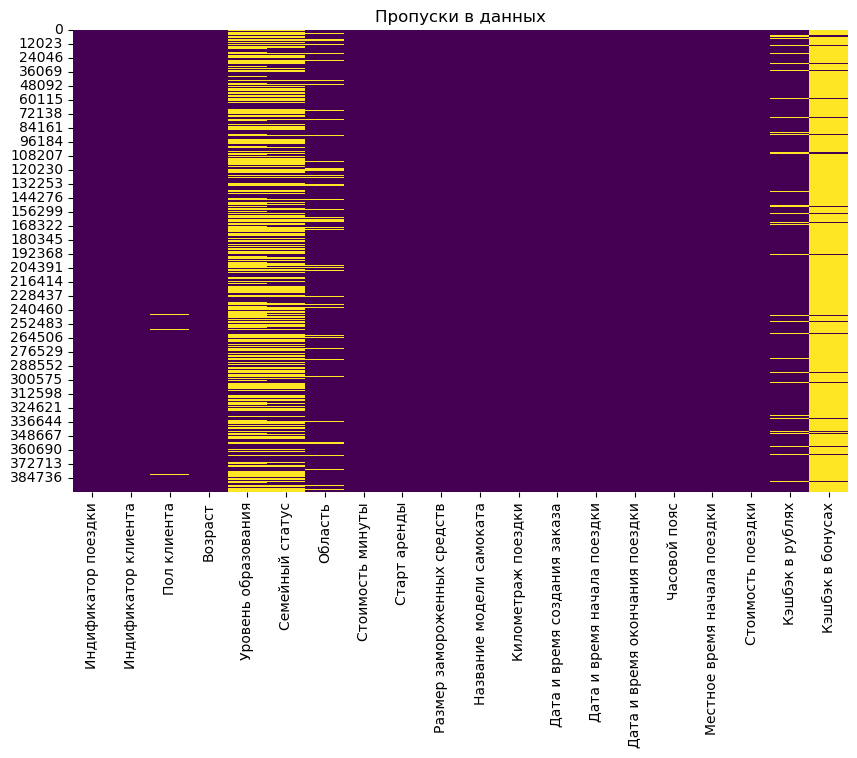

Кэшбэк в бонусах       94.468039
Уровень образования    52.095910
Семейный статус        45.121727
Область                 8.614262
Кэшбэк в рублях         7.500208
Пол клиента             0.736234
dtype: float64


In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Пропуски в данных")
plt.show()

missing_data = df.isnull().sum() / len(df) * 100 # Процент пропусков по каждому столбцу
print(missing_data[missing_data > 0].sort_values(ascending=False))

### Проверка на дубликаты

In [65]:
display(df[df.duplicated()])

Empty DataFrame
Columns: [Индификатор поездки, Индификатор клиента, Пол клиента, Возраст, Уровень образования, Семейный статус, Область, Стоимость минуты, Старт аренды, Размер замороженных средств, Название модели самоката, Километраж поездки, Дата и время создания заказа, Дата и время начала поездки, Дата и время окончания поездки, Часовой пояс, Местное время начала поездки, Стоимость поездки, Кэшбэк в рублях, Кэшбэк в бонусах]
Index: []

In [66]:
total_duplicates = df.duplicated().sum()
print(f"Общее количество дублирующихся строк во всем DataFrame: {total_duplicates}")

Общее количество дублирующихся строк во всем DataFrame: 0


### Анализ категориальных признаков

In [67]:
for col in ['Уровень образования', 'Семейный статус', 'Название модели самоката']:
    print(f'--- {col} ---')
    print(df[col].value_counts())
    print()

--- Уровень образования ---
Уровень образования
GRD    94341
SCH    51273
UGR    38896
PGR     4224
ACD     1325
Name: count, dtype: int64

--- Семейный статус ---
Семейный статус
UNM    116094
MAR     74061
CIV     15036
DIV     11820
WID       718
Name: count, dtype: int64

--- Название модели самоката ---
Название модели самоката
SL              241247
Max              70301
E                67666
Urban E-Bike      4704
ES400             4152
ES200             3325
ES100             2829
MK                1054
ES-08S             911
Techno             228
ES                 119
LB                 115
Lucky               62
B1D                 36
Name: count, dtype: int64



### Взаимосвязи между признаками

In [68]:
display(df.groupby('Уровень образования')['Стоимость поездки'].mean()) # Средняя стоимость поездки по уровню образования
display(df.groupby('Семейный статус')['Стоимость поездки'].mean()) # Средняя стоимость по семейному статусу

Уровень образования
ACD    134.964906
GRD    129.171204
PGR    130.885597
SCH    127.884222
UGR    125.484136
Name: Стоимость поездки, dtype: float64

Семейный статус
CIV    128.508685
DIV    135.287406
MAR    130.909145
UNM    125.997172
WID    132.647173
Name: Стоимость поездки, dtype: float64

### Анализ временных рядов

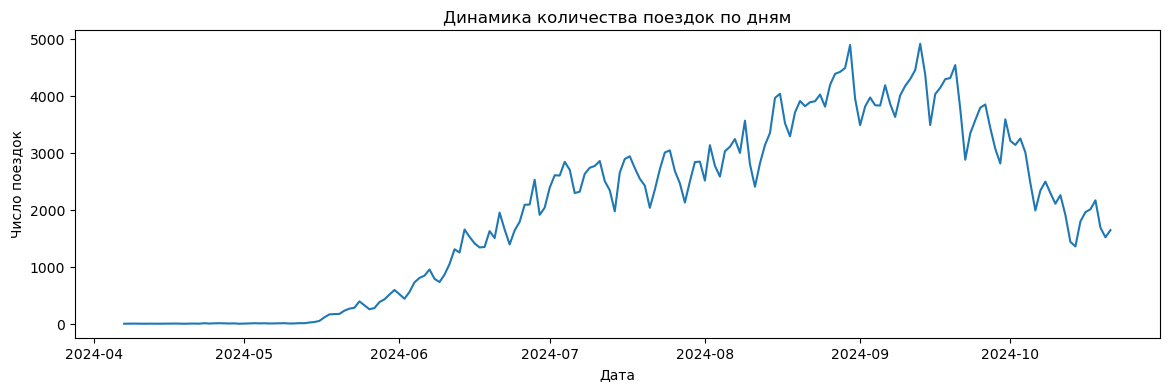

In [69]:
# Динамика поездок по дням
df['Дата'] = pd.to_datetime(df['Дата и время начала поездки']).dt.date
trips_by_day = df.groupby('Дата')['Индификатор поездки'].count()
plt.figure(figsize=(14,4))
trips_by_day.plot()
plt.title('Динамика количества поездок по дням')
plt.xlabel('Дата')
plt.ylabel('Число поездок')
plt.show()

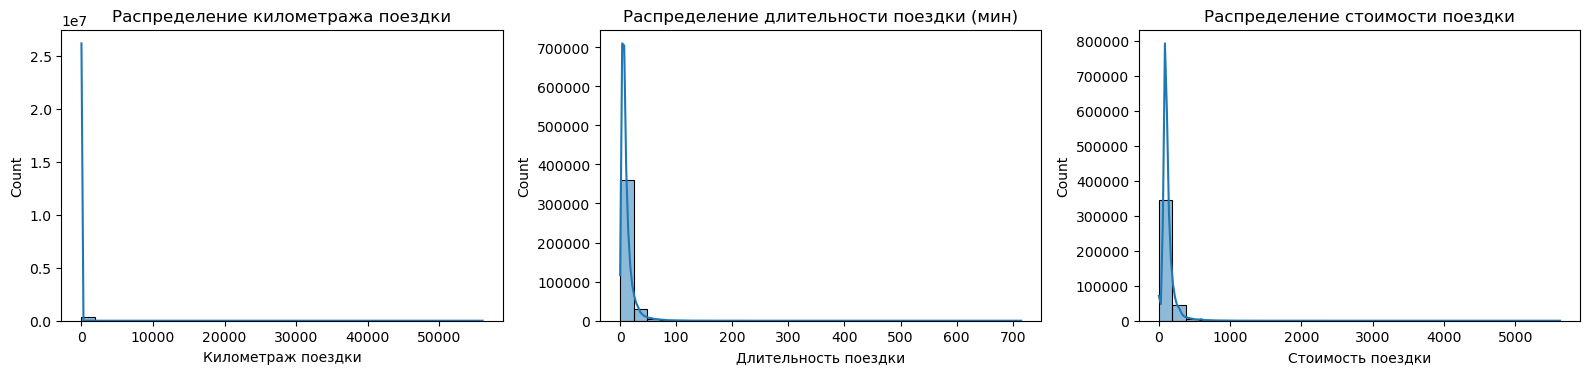

In [70]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Километраж поездки'], bins=30, kde=True)
plt.title('Распределение километража поездки')

plt.subplot(1, 3, 2)
# Если нет столбца "Длительность поездки", создаём его
if 'Длительность поездки' not in df.columns:
    df['Длительность поездки'] = (pd.to_datetime(df['Дата и время окончания поездки']) - pd.to_datetime(df['Дата и время начала поездки'])).dt.total_seconds() / 60
sns.histplot(df['Длительность поездки'], bins=30, kde=True)
plt.title('Распределение длительности поездки (мин)')

plt.subplot(1, 3, 3)
sns.histplot(df['Стоимость поездки'], bins=30, kde=True)
plt.title('Распределение стоимости поездки')
plt.tight_layout()
plt.show()

### Анализ пропусков по категориям

In [71]:
# Пропуски по категориям
for col in ['Область', 'Пол клиента']:
    display(df.groupby(col).apply(lambda x: x.isnull().mean()))

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/1972961185.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  display(df.groupby(col).apply(lambda x: x.isnull().mean()))


Индификатор поездки  \
Область                                                            
ISRAEL                                                       0.0   
АЛТАЙСКИЙ КРАЙ                                               0.0   
АМУРСКАЯ ОБЛ                                                 0.0   
АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА                  0.0   
АО ЯМАЛО-НЕНЕЦКИЙ                                            0.0   
...                                                          ...   
ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ                               0.0   
ЧУВАШСКАЯ РЕСПУБЛИКА ЧУВАШИЯ                                 0.0   
ЧУКОТСКИЙ АО                                                 0.0   
ЯМАЛО-НЕНЕЦКИЙ АО                                            0.0   
ЯРОСЛАВСКАЯ ОБЛ                                              0.0   

                                             Индификатор клиента  Пол клиента  \
Область                                                                         
ISRAEL                                                       0.0     0.000000   
АЛТАЙСКИЙ КРАЙ                                               0.0     0.020518   
АМУРСКАЯ ОБЛ                                                 0.0     0.000000   
АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА                  0.0     0.000000   
АО ЯМАЛО-НЕНЕЦКИЙ                                            0.0     0.000000   
...                                                          ...          ...   
ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ                               0.0     0.000000   
ЧУВАШСКАЯ РЕСПУБЛИКА ЧУВАШИЯ                                 0.0     0.000000   
ЧУКОТСКИЙ АО                                                 0.0     0.000000   
ЯМАЛО-НЕНЕЦКИЙ АО                                            0.0     0.000000   
ЯРОСЛАВСКАЯ ОБЛ                                              0.0     0.016775   

                                             Возраст  Уровень образования  \
Область                                                                     
ISRAEL                                           0.0             1.000000   
АЛТАЙСКИЙ КРАЙ                                   0.0             0.414687   
АМУРСКАЯ ОБЛ                                     0.0             0.253561   
АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА      0.0             0.812500   
АО ЯМАЛО-НЕНЕЦКИЙ                                0.0             1.000000   
...                                              ...                  ...   
ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ                   0.0             0.569754   
ЧУВАШСКАЯ РЕСПУБЛИКА ЧУВАШИЯ                     0.0             0.250000   
ЧУКОТСКИЙ АО                                     0.0             0.354839   
ЯМАЛО-НЕНЕЦКИЙ АО                                0.0             0.503650   
ЯРОСЛАВСКАЯ ОБЛ                                  0.0             0.363095   

                                             Семейный статус  Область  \
Область                                                                 
ISRAEL                                              1.000000      0.0   
АЛТАЙСКИЙ КРАЙ                                      0.330454      0.0   
АМУРСКАЯ ОБЛ                                        0.156695      0.0   
АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА         0.812500      0.0   
АО ЯМАЛО-НЕНЕЦКИЙ                                   1.000000      0.0   
...                                                      ...      ...   
ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ                      0.504103      0.0   
ЧУВАШСКАЯ РЕСПУБЛИКА ЧУВАШИЯ                        0.250000      0.0   
ЧУКОТСКИЙ АО                                        0.322581      0.0   
ЯМАЛО-НЕНЕЦКИЙ АО                                   0.457421      0.0   
ЯРОСЛАВСКАЯ ОБЛ                                     0.292208      0.0   

                                             Стоимость минуты  Старт аренды  \
Область                                                                    

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/1972961185.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  display(df.groupby(col).apply(lambda x: x.isnull().mean()))


Индификатор поездки  Индификатор клиента  Пол клиента  Возраст  \
Пол клиента                                                                   
F                            0.0                  0.0          0.0      0.0   
M                            0.0                  0.0          0.0      0.0   

             Уровень образования  Семейный статус   Область  Стоимость минуты  \
Пол клиента                                                                     
F                       0.561059         0.491999  0.125355               0.0   
M                       0.510150         0.439665  0.079798               0.0   

             Старт аренды  Размер замороженных средств  ...  \
Пол клиента                                             ...   
F                     0.0                          0.0  ...   
M                     0.0                          0.0  ...   

             Дата и время создания заказа  Дата и время начала поездки  \
Пол клиента                                                              
F                                     0.0                          0.0   
M                                     0.0                          0.0   

             Дата и время окончания поездки  Часовой пояс  \
Пол клиента                                                 
F                                       0.0           0.0   
M                                       0.0           0.0   

             Местное время начала поездки  Стоимость поездки  Кэшбэк в рублях  \
Пол клиента                                                                     
F                                     0.0                0.0         0.060322   
M                                     0.0                0.0         0.078049   

             Кэшбэк в бонусах  Дата  Длительность поездки  
Пол клиента                                                
F                    0.957615   0.0                   0.0  
M                    0.941963   0.0                   0.0  

[2 rows x 22 columns]

### Проверка на существование мультиколлиниарности 

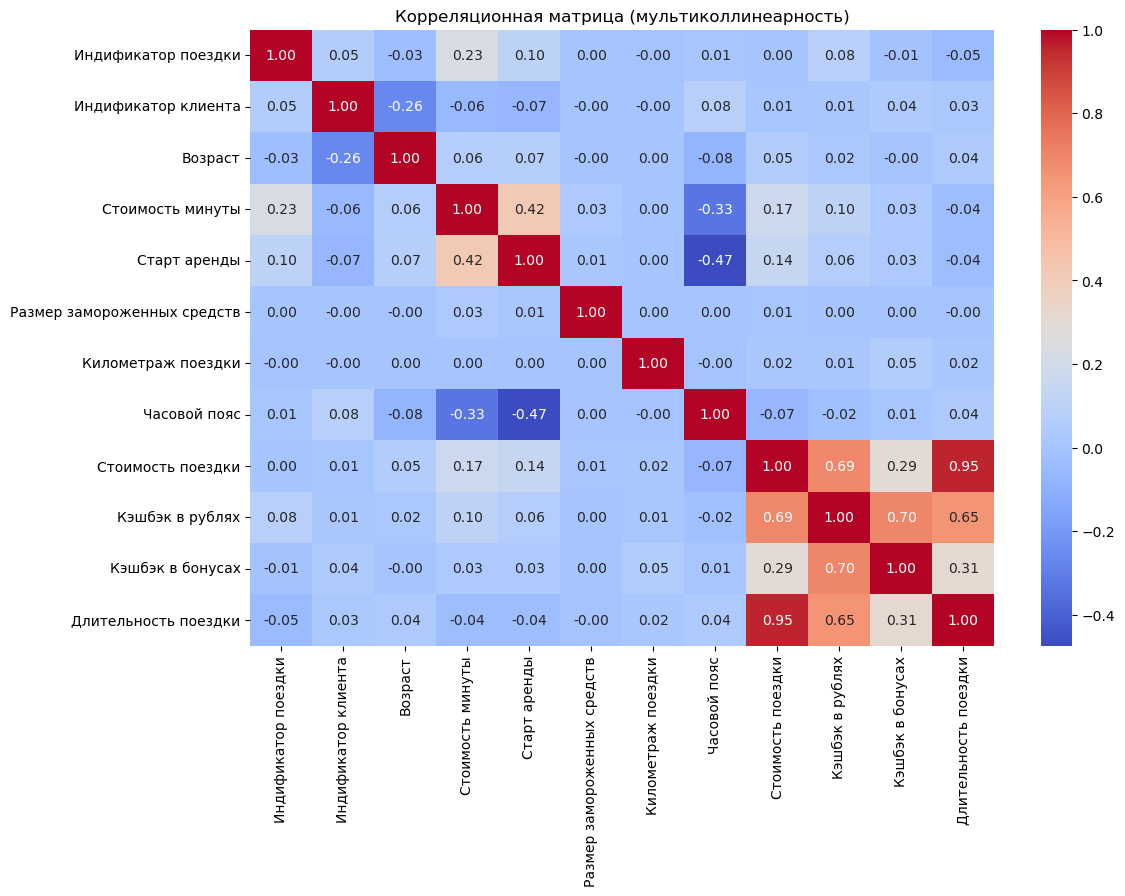

Пары признаков с высокой корреляцией:
Стоимость поездки  Длительность поездки    0.954731
dtype: float64


In [72]:
# Проверка на мультиколлинеарность
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (мультиколлинеарность)')
plt.show()

# Выводим пары признаков с высокой корреляцией (> 0.7 или < -0.7, кроме диагонали)
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1].drop_duplicates()
print('Пары признаков с высокой корреляцией:')
print(high_corr[high_corr > 0.7])

# Визуализация данных 

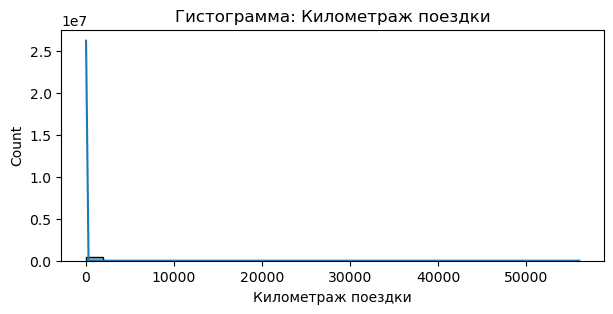

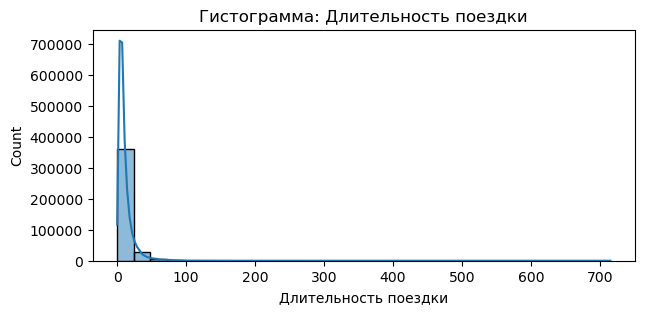

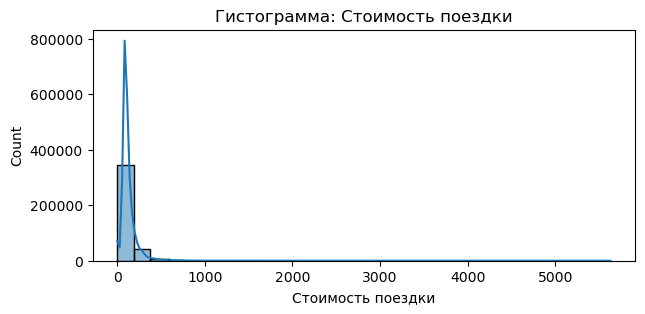

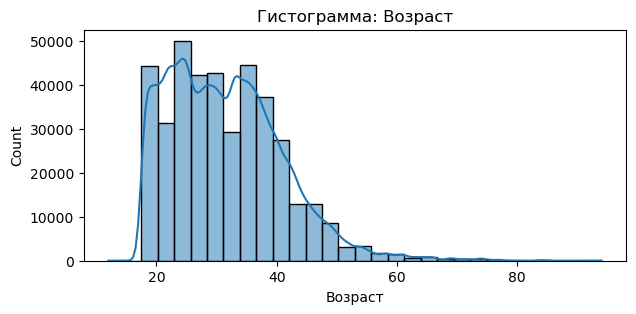

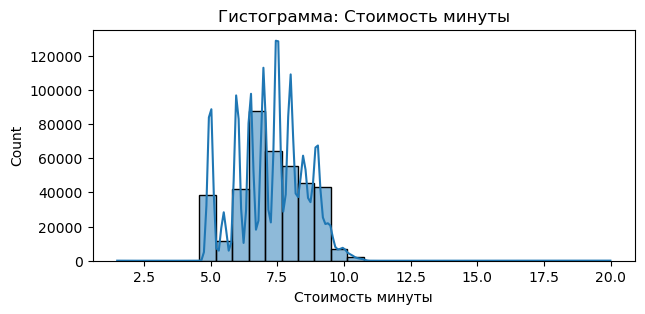

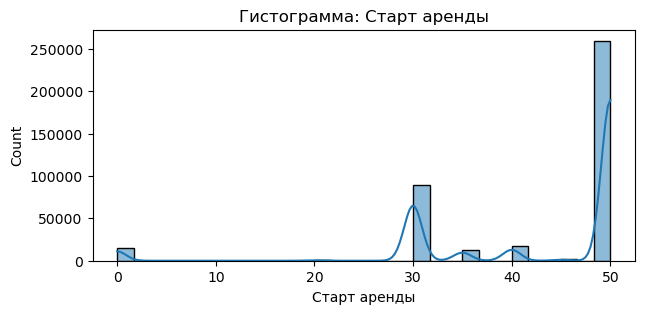

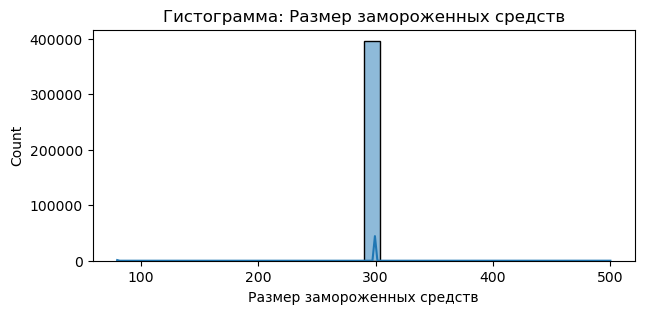

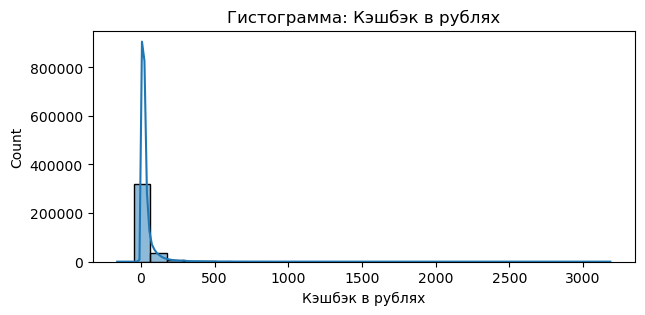

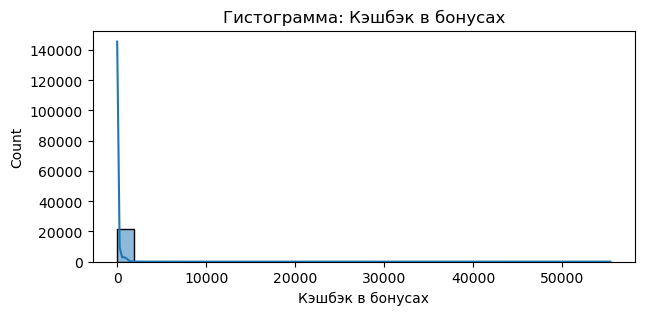

In [73]:
# Гистограммы для числовых признаков
num_cols = ['Километраж поездки', 'Длительность поездки', 'Стоимость поездки', 'Возраст', 'Стоимость минуты', 'Старт аренды', 'Размер замороженных средств', 'Кэшбэк в рублях', 'Кэшбэк в бонусах']
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(7, 3))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Гистограмма: {col}')
        plt.show()

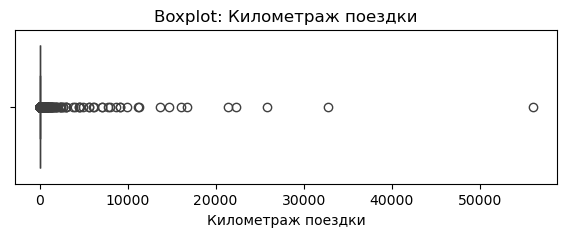

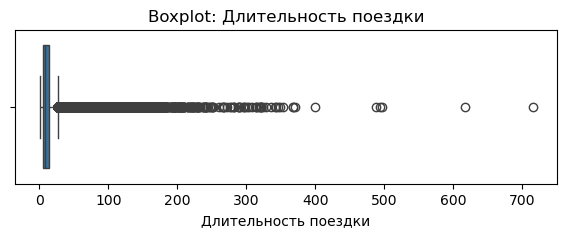

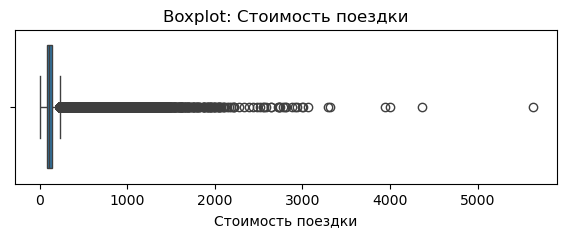

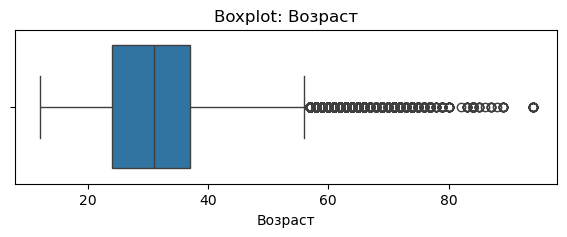

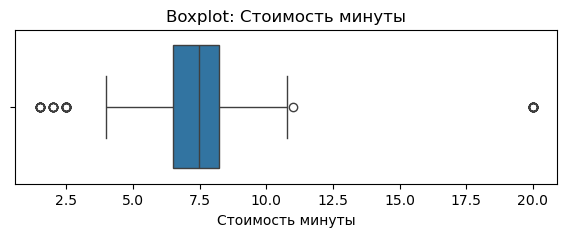

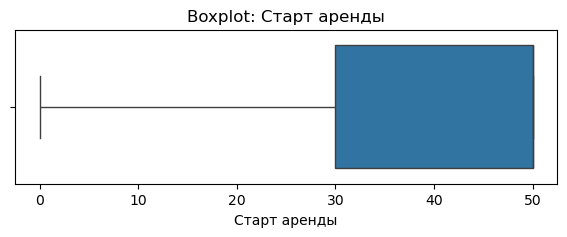

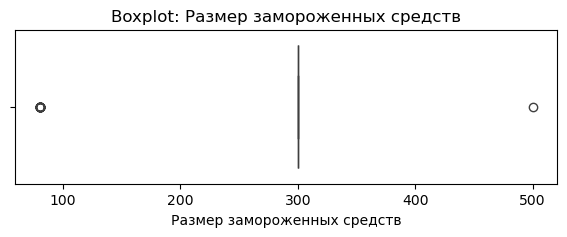

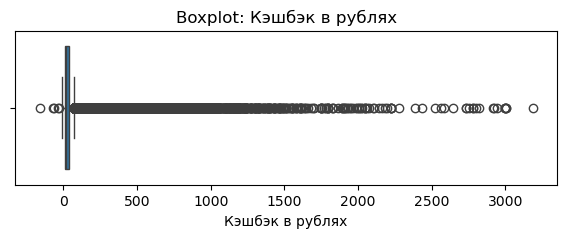

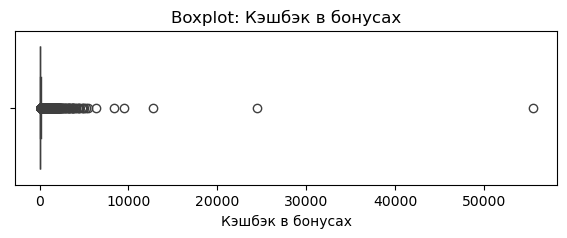

In [74]:
# Boxplot для поиска выбросов - это база 
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(7, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()

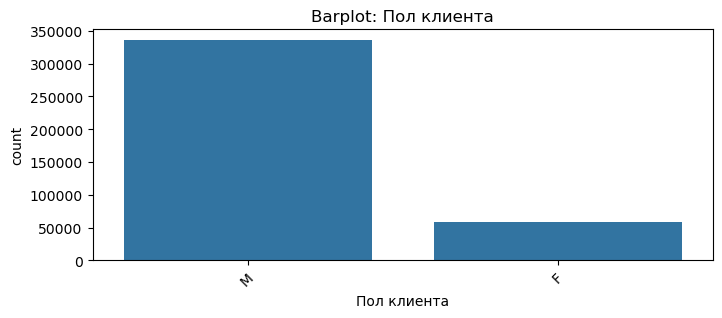

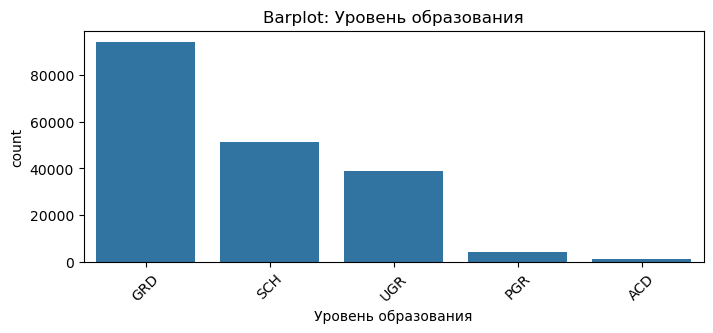

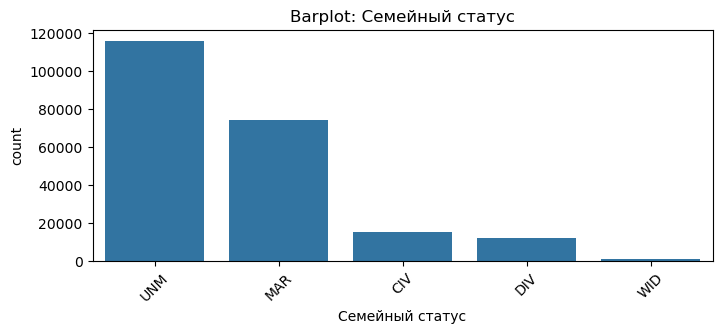

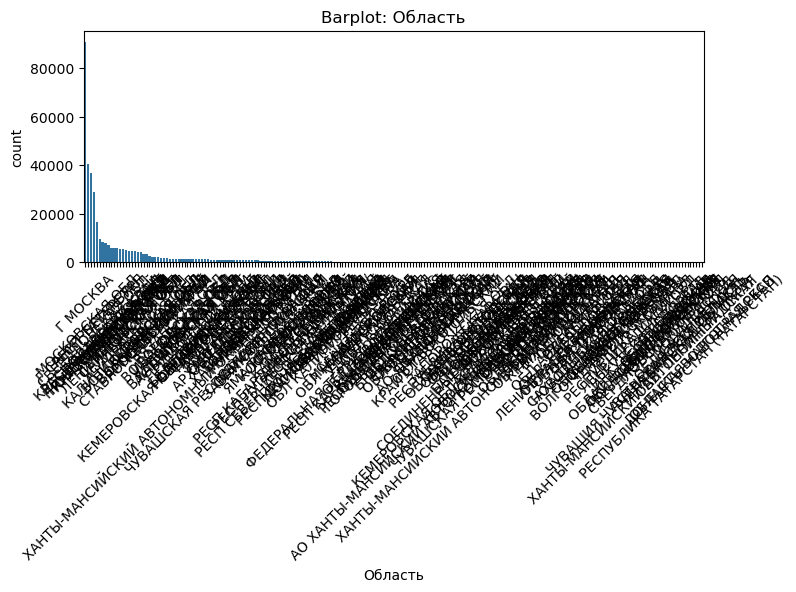

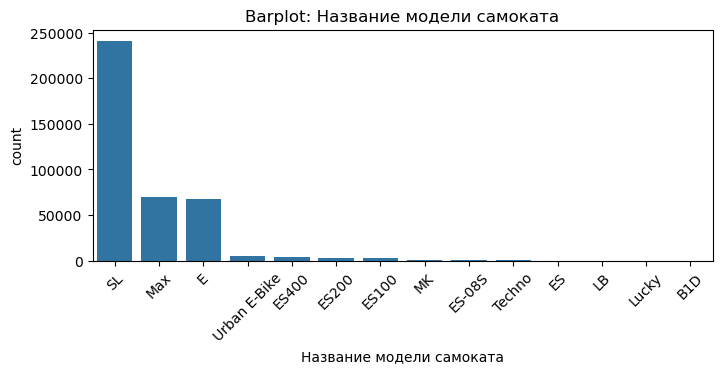

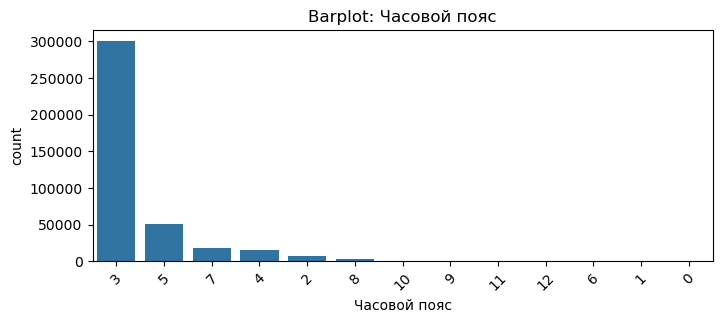

In [75]:
# Barplot для категориальных признаков
cat_cols = ['Пол клиента', 'Уровень образования', 'Семейный статус', 'Область', 'Название модели самоката', 'Часовой пояс']
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 3))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Barplot: {col}')
        plt.xticks(rotation=45)
        plt.show()


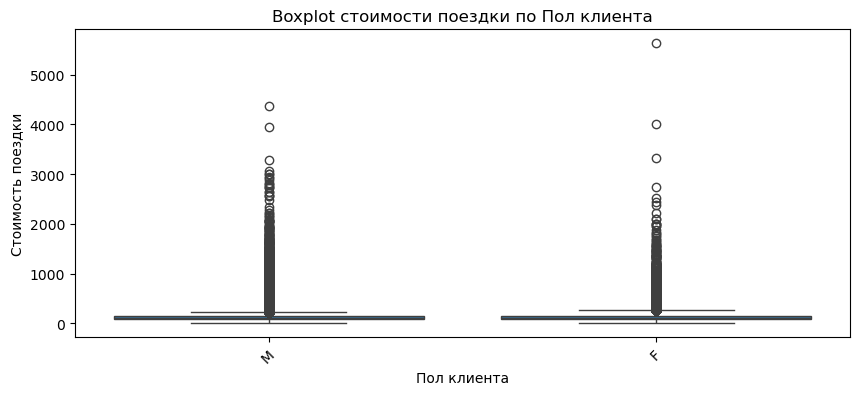

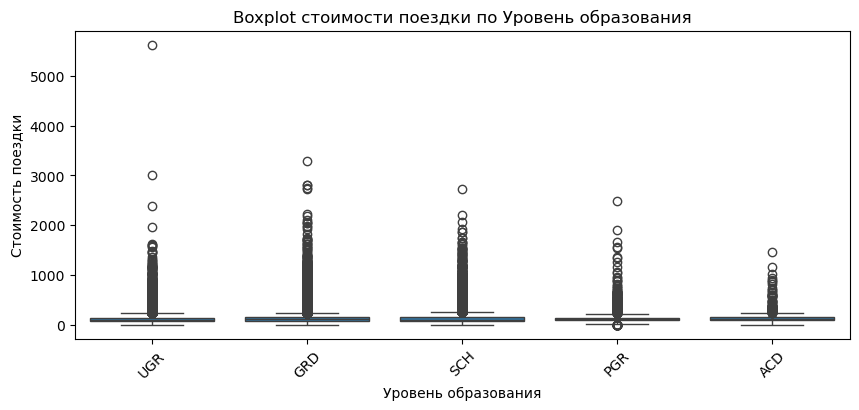

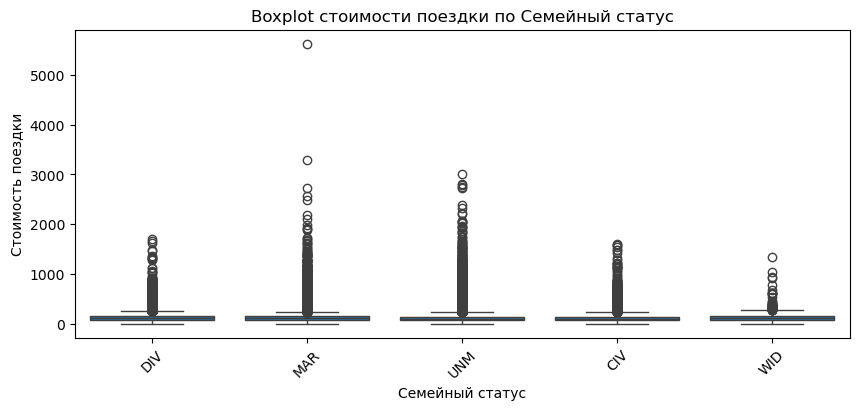

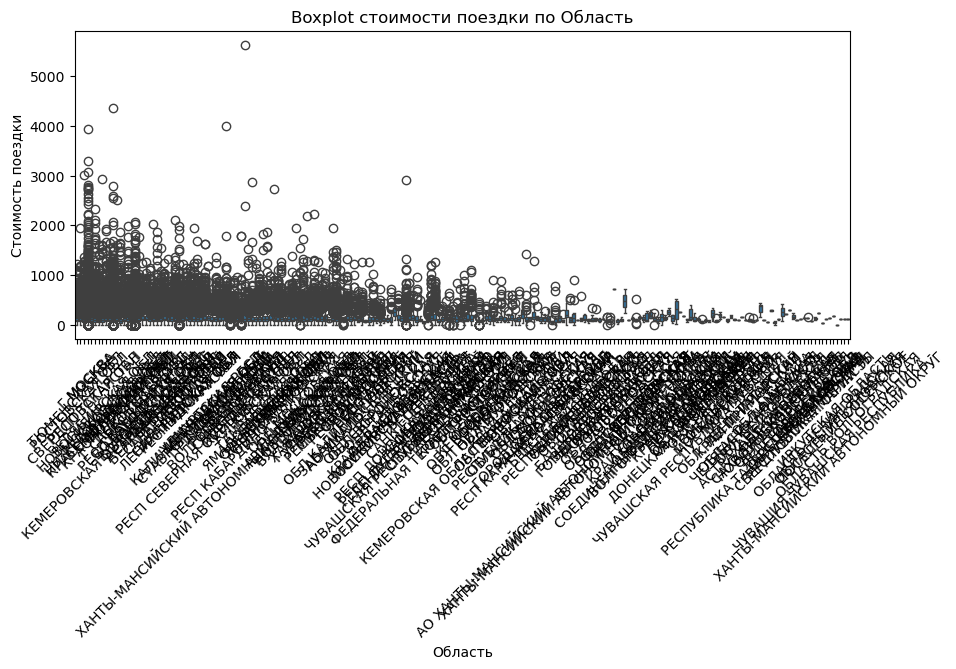

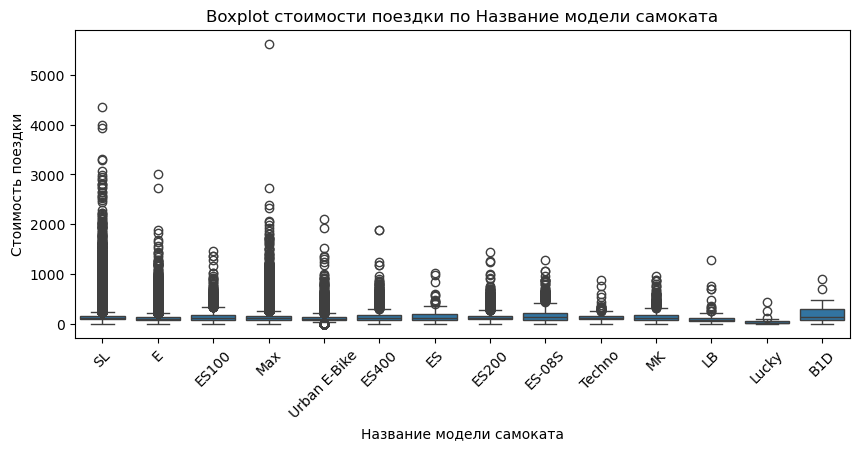

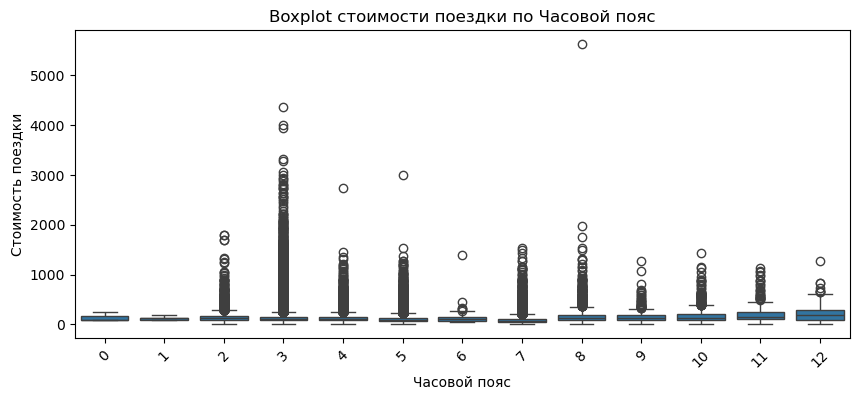

In [76]:
# Boxplot стоимости поездки по категориям
for cat in cat_cols:
    if cat in df.columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(data=df, x=cat, y='Стоимость поездки')
        plt.title(f'Boxplot стоимости поездки по {cat}')
        plt.xticks(rotation=45)
        plt.show()

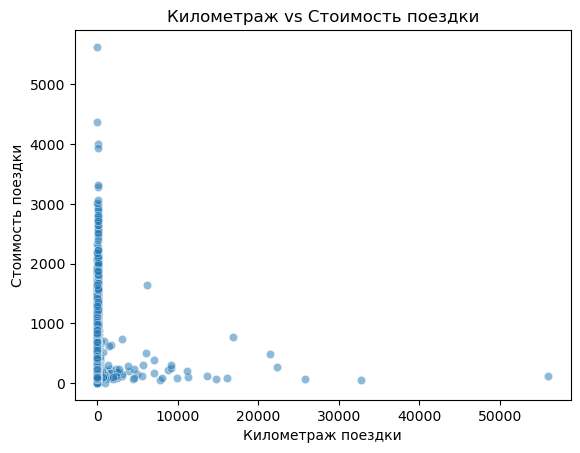

In [77]:
# Scatterplot для пар числовых признаков
sns.scatterplot(data=df, x='Километраж поездки', y='Стоимость поездки', alpha=0.5)
plt.title('Километраж vs Стоимость поездки')
plt.xlabel('Километраж поездки')
plt.ylabel('Стоимость поездки')
plt.show()

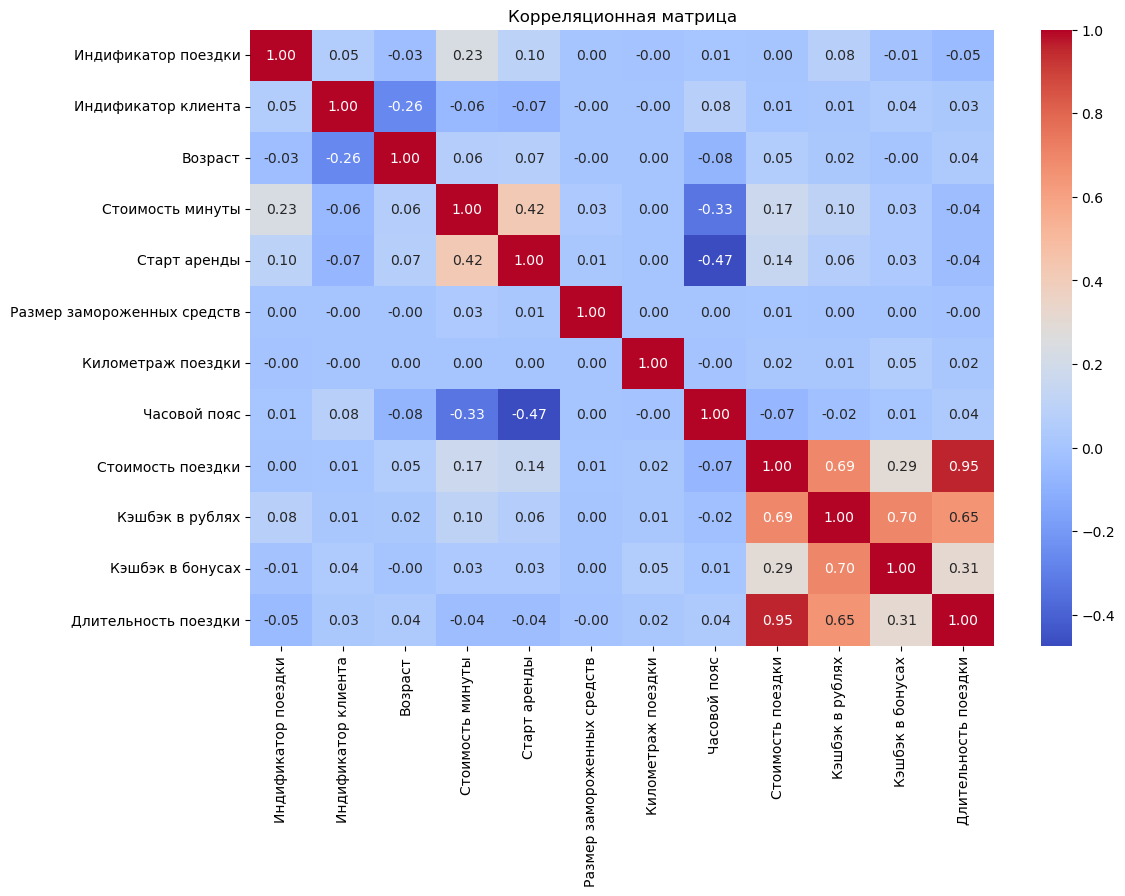

In [78]:
# Корреляционная матрица (
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

## Датасет состоящий из значений, выходящих за IQR (это часть для меня, я ± буду смотреть и сравнивать с 1 и 99 перцентилем) 

In [79]:
num_cols = ['Километраж поездки', 'Длительность поездки', 'Стоимость поездки', 'Стоимость минуты', 'Старт аренды', 'Размер замороженных средств', 'Кэшбэк в рублях', 'Кэшбэк в бонусах']
outliers_df = pd.DataFrame()

for col in num_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers_df = pd.concat([outliers_df, df[mask]])
outliers_df = outliers_df.drop_duplicates()

In [80]:
outliers_df.shape

(71176, 22)

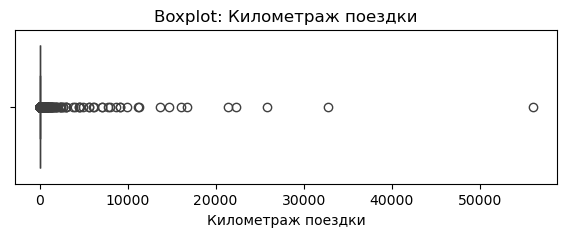

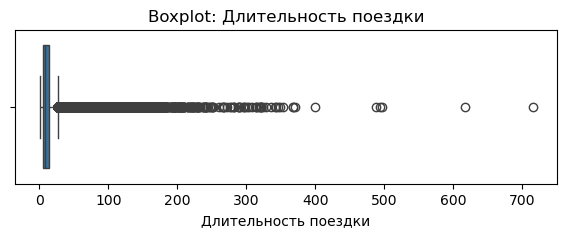

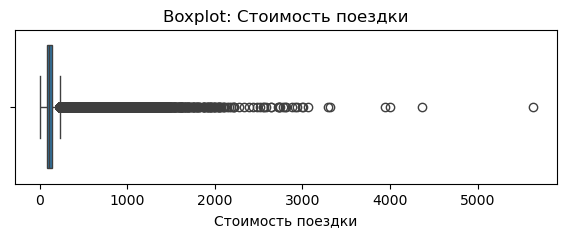

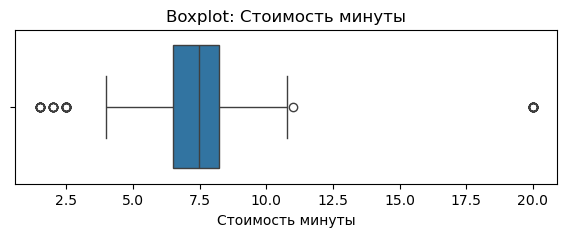

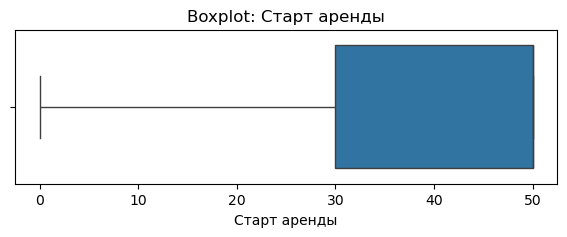

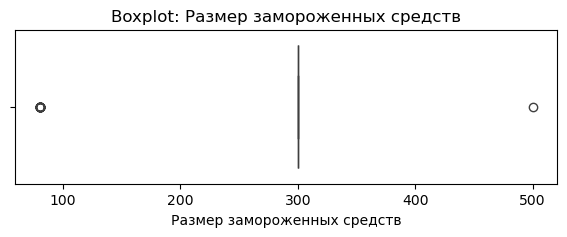

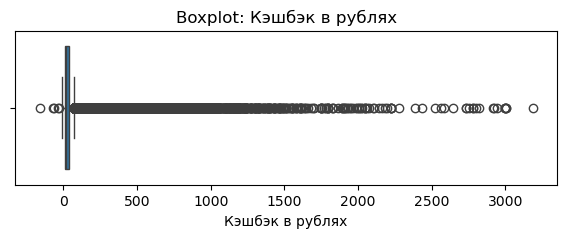

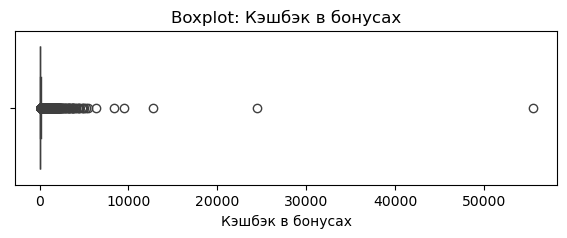

In [81]:
for col in num_cols:
    if col in outliers_df.columns:
        plt.figure(figsize=(7, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()

## Посмотрим на это под процентилями (1 и 99)

In [82]:
num_cols = ['Километраж поездки', 'Длительность поездки', 'Стоимость поездки', 'Стоимость минуты', 'Старт аренды', 'Размер замороженных средств', 'Кэшбэк в рублях', 'Кэшбэк в бонусах']
outliers_percentile_df = pd.DataFrame()

for col in num_cols:
    if col in df.columns:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        mask = (df[col] < lower) | (df[col] > upper)
        outliers_percentile_df = pd.concat([outliers_percentile_df, df[mask]])

outliers_percentile_df = outliers_percentile_df.drop_duplicates()
display(outliers_percentile_df)

Индификатор поездки  Индификатор клиента Пол клиента  Возраст  \
28                291383137            678375751           M       39   
88                262576877            684382319           M       32   
94                272402257            620037932           M       39   
143               348290207            943518611           M       23   
164               257357715            262400916           M       36   
...                     ...                  ...         ...      ...   
390372            252874940            164405223           M       41   
391419            275216451            132038991           M       44   
393020            255212570            155440844           M       33   
393741            270439615             82638400           M       35   
395397            265814593            938921719           M       27   

       Уровень образования Семейный статус             Область  \
28                     GRD             MAR   КРАСНОЯРСКИЙ КРАЙ   
88                     NaN             UNM  КРАСНОДАРСКИЙ КРАЙ   
94                     NaN             NaN     РЕСП УДМУРТСКАЯ   
143                    SCH             CIV     ВОЛОГОДСКАЯ ОБЛ   
164                    NaN             NaN   ВОЛГОГРАДСКАЯ ОБЛ   
...                    ...             ...                 ...   
390372                 SCH             MAR            Г МОСКВА   
391419                 GRD             UNM  КРАСНОДАРСКИЙ КРАЙ   
393020                 GRD             MAR   Г САНКТ-ПЕТЕРБУРГ   
393741                 UGR             UNM   КРАСНОЯРСКИЙ КРАЙ   
395397                 SCH             UNM    БЕЛГОРОДСКАЯ ОБЛ   

        Стоимость минуты  Старт аренды  Размер замороженных средств  ...  \
28                  5.99           0.0                        300.0  ...   
88                  4.99          35.0                        300.0  ...   
94                  6.99          50.0                        300.0  ...   
143                 7.99          40.0                        300.0  ...   
164                 5.99          30.0                        300.0  ...   
...                  ...           ...                          ...  ...   
390372              6.99           0.0                        300.0  ...   
391419              7.99          50.0                        300.0  ...   
393020              5.99           0.0                        300.0  ...   
393741              5.99           0.0                        300.0  ...   
395397              8.49          40.0                        300.0  ...   

       Дата и время создания заказа  Дата и время начала поездки  \
28       2024-09-11 03:48:17.000000   2024-09-11 03:48:21.289000   
88       2024-07-25 05:00:04.000000   2024-07-25 05:00:07.915984   
94       2024-08-30 14:46:35.000000   2024-08-30 14:46:40.157798   
143      2024-09-22 17:19:52.000000   2024-09-22 17:19:55.407000   
164      2024-07-05 10:00:11.000000   2024-07-05 10:00:16.268551   
...                             ...                          ...   
390372   2024-06-18 07:41:02.000000   2024-06-18 07:41:06.049572   
391419   2024-09-09 10:01:19.000000   2024-09-09 10:01:25.317000   
393020   2024-06-27 12:26:52.000000   2024-06-27 12:26:55.655952   
393741   2024-08-23 06:46:15.000000   2024-08-23 06:46:18.600714   
395397   2024-08-06 17:32:27.000000   2024-08-06 17:32:30.384517   

       Дата и время окончания поездки Часовой пояс  \
28         2024-09-11 04:37:24.592000            7   
88         2024-07-25 05:57:18.197249            3   
94         2024-08-30 15:46:46.980933            4   
143        2024-09-22 19:01:00.461892            3   
164        2024-07-05 10:11:08.166851            3   
...                               ...          ...   
390372     2024-06-18 07:44:41.232486            3   
391419     2024-09-09 10:11:34.431031            3   
393020     2024-06-27 12:30:49.981794            3   
393741     2024-08-23 06:50:55.377392            7   
395397     202

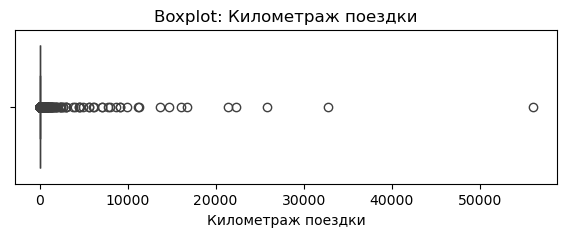

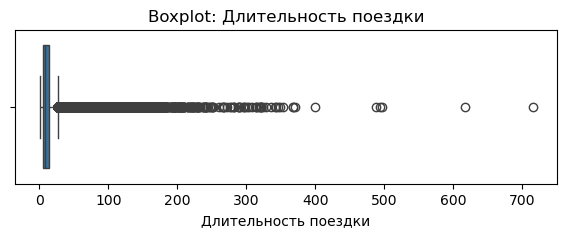

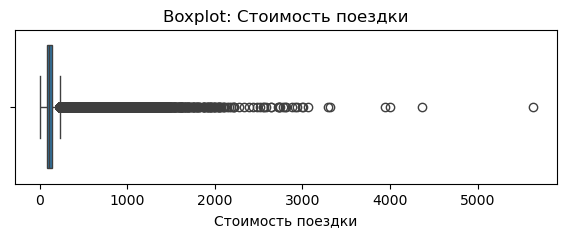

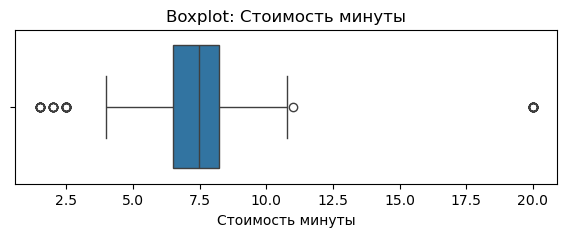

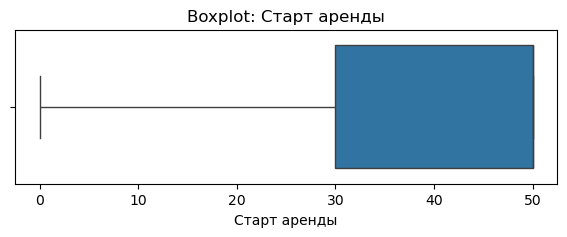

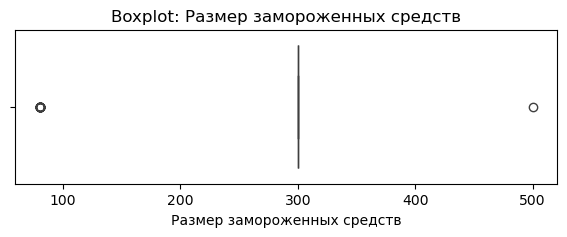

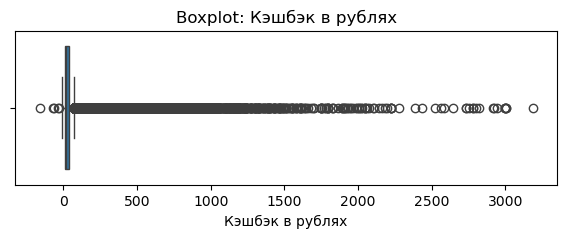

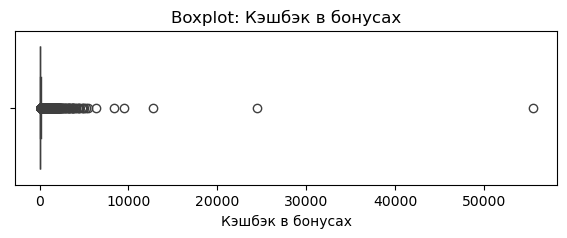

In [83]:
for col in num_cols:
    if col in outliers_percentile_df.columns:
        plt.figure(figsize=(7, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()

# **Подготовим очищенный датасет**

In [84]:
df.drop(columns=['Кэшбэк в бонусах'], inplace=True)
print(df.columns)
print(df.shape)

Index(['Индификатор поездки', 'Индификатор клиента', 'Пол клиента', 'Возраст',
       'Уровень образования', 'Семейный статус', 'Область', 'Стоимость минуты',
       'Старт аренды', 'Размер замороженных средств',
       'Название модели самоката', 'Километраж поездки',
       'Дата и время создания заказа', 'Дата и время начала поездки',
       'Дата и время окончания поездки', 'Часовой пояс',
       'Местное время начала поездки', 'Стоимость поездки', 'Кэшбэк в рублях',
       'Дата', 'Длительность поездки'],
      dtype='object')
(396749, 21)


In [85]:
def clean_dataset_remove_outliers(df, columns):
    """
    Удаляет строки, где хотя бы в одном из указанных столбцов значение
    меньше 1-го или больше 99-го перцентиля (строка считается выбросом).
    """
    mask = pd.Series(False, index=df.index)
    for col in columns:
        if col in df.columns and np.issubdtype(df[col].dtype, np.number):
            lower = df[col].quantile(0.01)
            upper = df[col].quantile(0.99)
            mask |= (df[col] < lower) | (df[col] > upper)
    return df[~mask]  # оставляем только строки без выбросов

num_cols = [
    'Километраж поездки', 'Длительность поездки', 'Стоимость поездки',
    'Стоимость минуты', 'Старт аренды', 'Размер замороженных средств',
    'Кэшбэк в рублях'
]
df = clean_dataset_remove_outliers(df, num_cols)
df.shape

(377176, 21)

In [86]:
df.shape

(377176, 21)

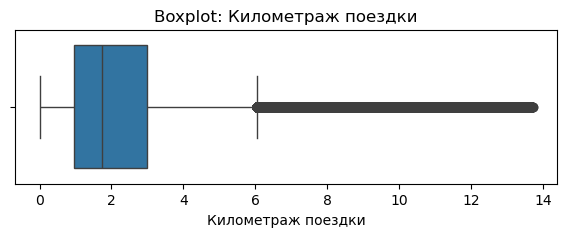

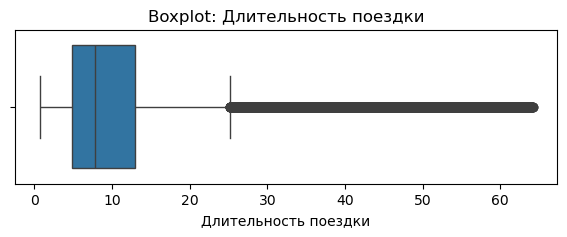

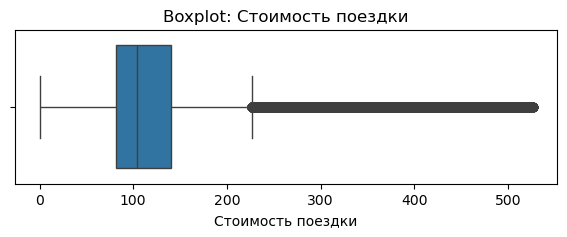

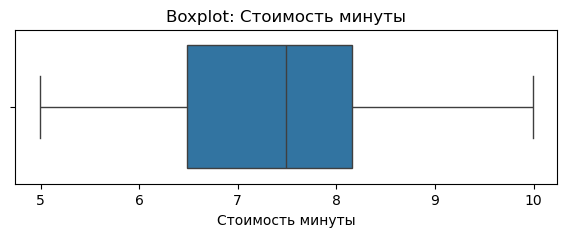

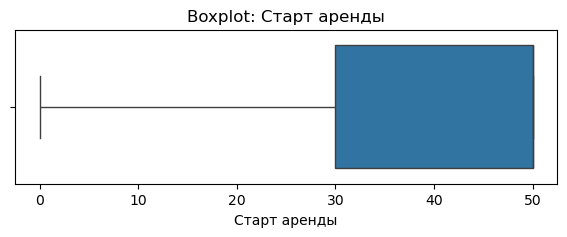

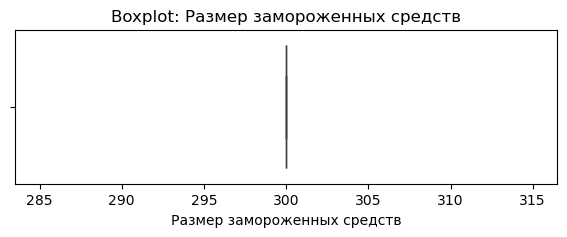

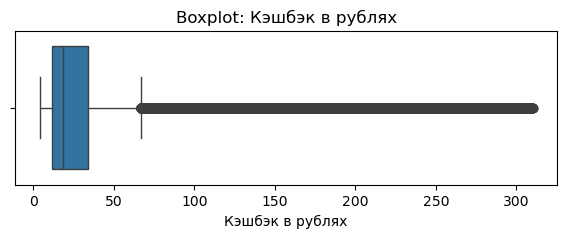

In [87]:
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(7, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()

## Начинаем более интересный анализ 

In [88]:
df.shape

(377176, 21)

In [89]:
display(df.groupby('Область')['Стоимость поездки'].mean().sort_values(ascending=False).head())
display(df.groupby('Пол клиента')['Стоимость поездки'].mean())
display(df.groupby('Название модели самоката')['Стоимость поездки'].mean().sort_values(ascending=False).head())

Область
ОБЛАСТЬ ТЮМЕНСКАЯ        323.346667
ОБЛ КУРСКАЯ              320.125000
ВОЛГОГРАДСКАЯ ОБЛАСТЬ    302.150000
ОБЛ СМОЛЕНСКАЯ           301.420000
ОБЛ БЕЛГОРОДСКАЯ         295.675000
Name: Стоимость поездки, dtype: float64

Пол клиента
F    128.379834
M    118.902661
Name: Стоимость поездки, dtype: float64

Название модели самоката
ES-08S    148.983701
B1D       148.005517
ES        140.523241
ES100     133.788638
MK        132.475798
Name: Стоимость поездки, dtype: float64

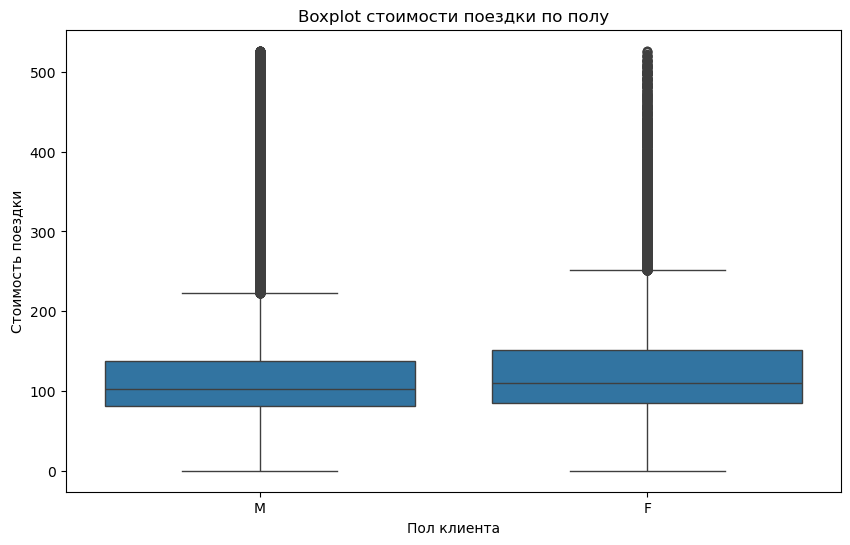

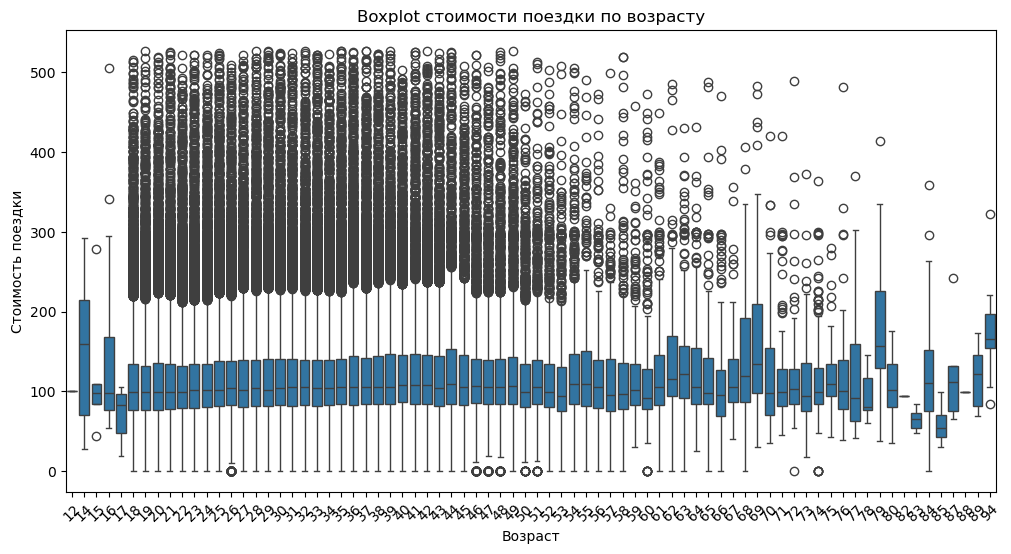

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Пол клиента', y='Стоимость поездки')
plt.title('Boxplot стоимости поездки по полу')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Возраст', y='Стоимость поездки')
plt.title('Boxplot стоимости поездки по возрасту')
plt.xticks(rotation=45)
plt.show()

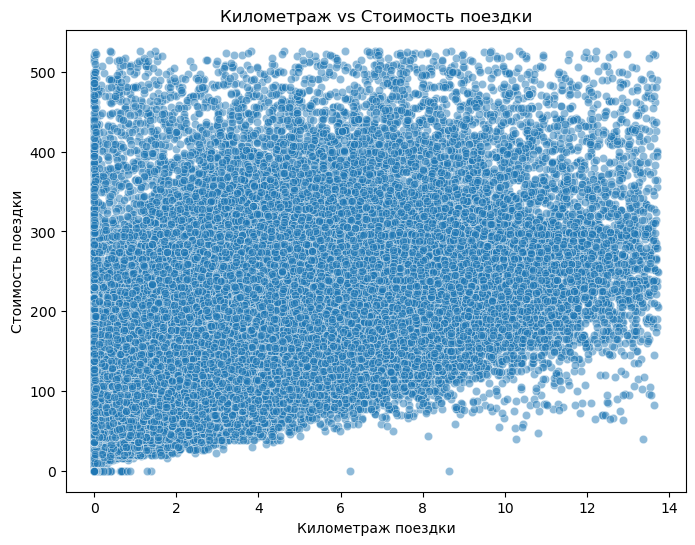

In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Километраж поездки', y='Стоимость поездки', alpha=0.5)
plt.title('Километраж vs Стоимость поездки')
plt.xlabel('Километраж поездки')
plt.ylabel('Стоимость поездки')
plt.show()

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/1778323089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')


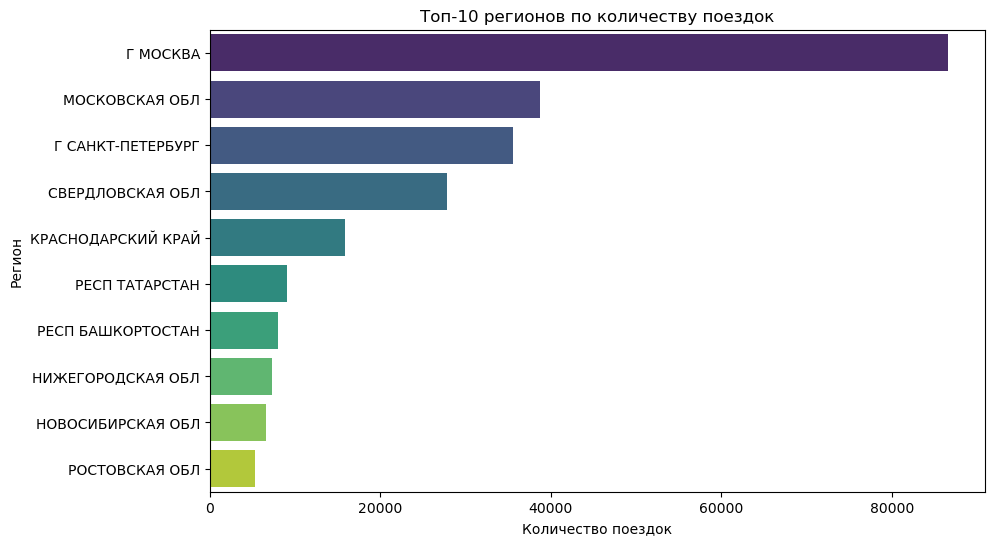

In [92]:
top_regions = df['Область'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title('Топ-10 регионов по количеству поездок')
plt.xlabel('Количество поездок')
plt.ylabel('Регион')
plt.show()

In [93]:
df.columns

Index(['Индификатор поездки', 'Индификатор клиента', 'Пол клиента', 'Возраст',
       'Уровень образования', 'Семейный статус', 'Область', 'Стоимость минуты',
       'Старт аренды', 'Размер замороженных средств',
       'Название модели самоката', 'Километраж поездки',
       'Дата и время создания заказа', 'Дата и время начала поездки',
       'Дата и время окончания поездки', 'Часовой пояс',
       'Местное время начала поездки', 'Стоимость поездки', 'Кэшбэк в рублях',
       'Дата', 'Длительность поездки'],
      dtype='object')

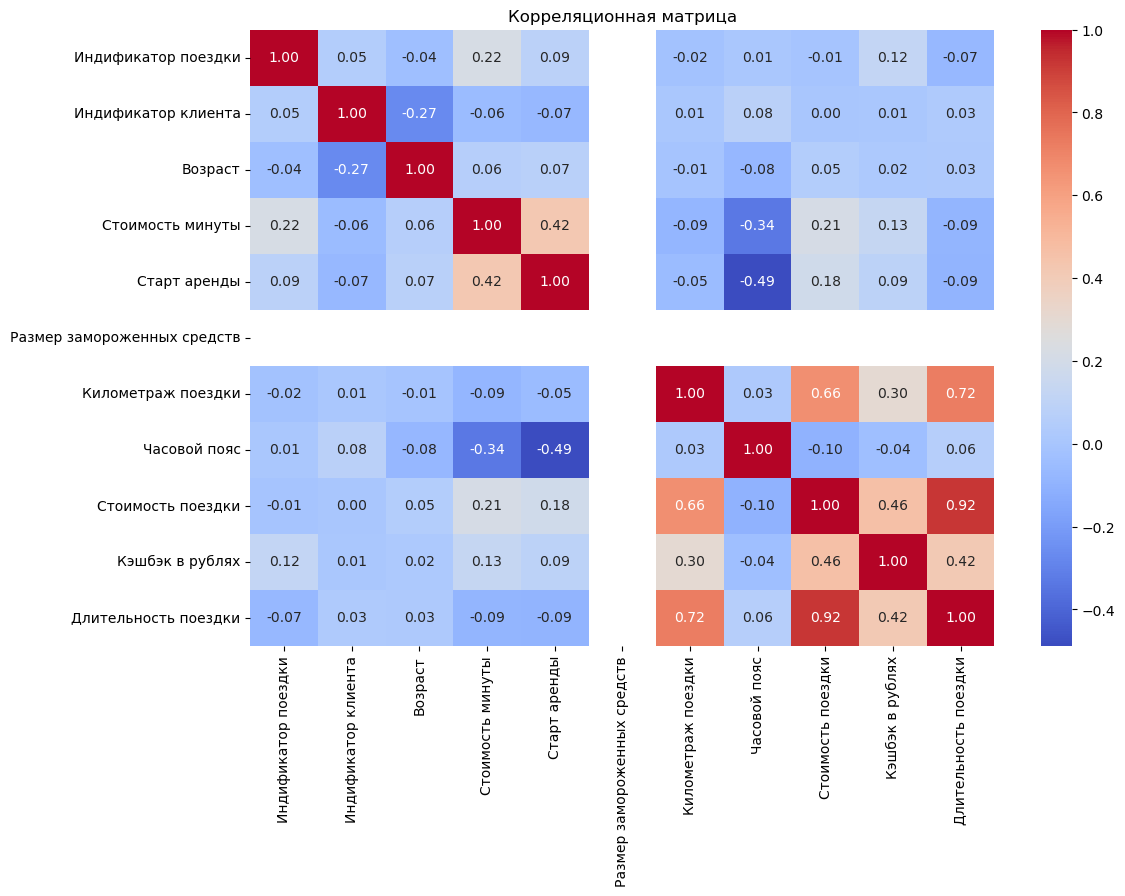

In [94]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

# Анализ профиля пользователя

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/3939264403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Пол клиента', palette='pastel')


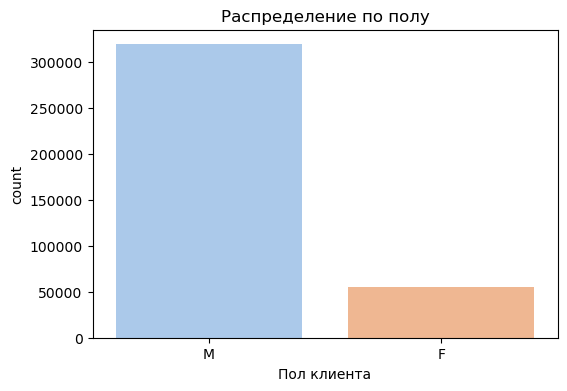

In [95]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Пол клиента', palette='pastel')
plt.title('Распределение по полу')
plt.show()

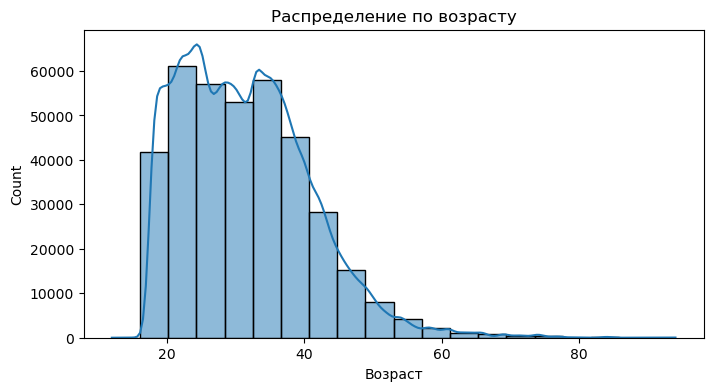

In [96]:
plt.figure(figsize=(8,4))
sns.histplot(df['Возраст'], bins=20, kde=True)
plt.title('Распределение по возрасту')
plt.show()

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/2459624661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')


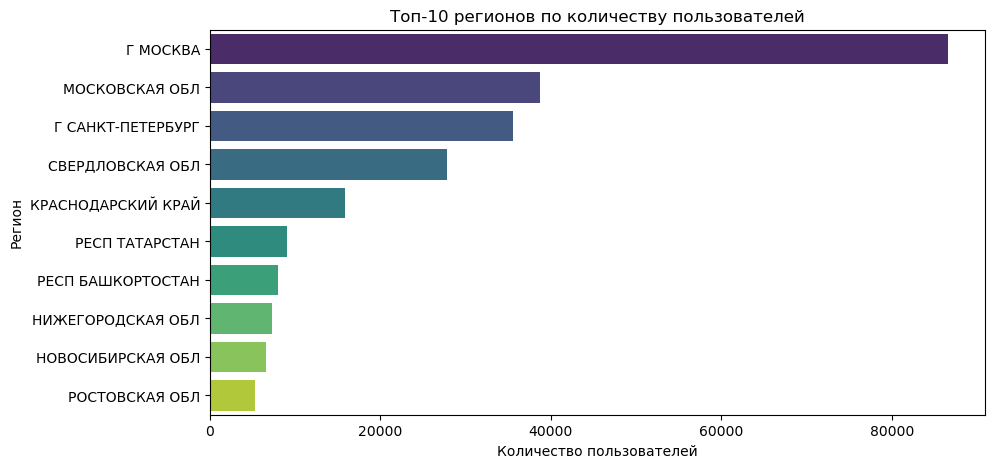

In [97]:
plt.figure(figsize=(10,5))
top_regions = df['Область'].value_counts().head(10)
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title('Топ-10 регионов по количеству пользователей')
plt.xlabel('Количество пользователей')
plt.ylabel('Регион')
plt.show()

In [98]:
user_trip_counts = df.groupby('Индификатор клиента')['Индификатор поездки'].count()
active_share = (user_trip_counts > 1).mean()
print(f"Доля активных пользователей (более 1 поездки): {active_share:.2%}")

Доля активных пользователей (более 1 поездки): 60.25%


In [99]:
print('Средняя длительность поездки (мин):', round(df['Длительность поездки'].mean(), 1))
print('Средняя стоимость поездки (руб):', round(df['Стоимость поездки'].mean(), 1))

Средняя длительность поездки (мин): 10.4
Средняя стоимость поездки (руб): 120.2


/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/3448627018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='viridis')


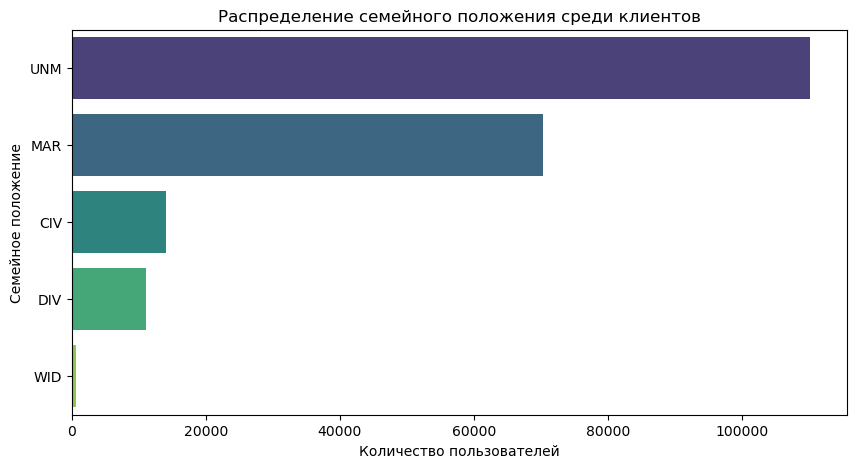

In [114]:
plt.figure(figsize=(10,5))
top = df['Семейный статус'].value_counts().head(10)
sns.barplot(x=top.values, y=top.index, palette='viridis')
plt.title('Распределение семейного положения среди клиентов')
plt.xlabel('Количество пользователей')
plt.ylabel('Семейное положение')
plt.show()

# Поведение и сезонность 

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/648288622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Час'] = pd.to_datetime(df['Дата и время начала поездки']).dt.hour
/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/648288622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Час', data=df, palette='mako')


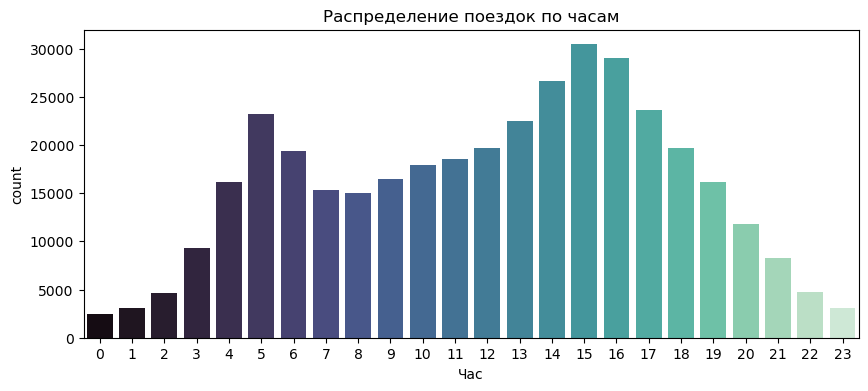

In [100]:
df['Час'] = pd.to_datetime(df['Дата и время начала поездки']).dt.hour
plt.figure(figsize=(10,4))
sns.countplot(x='Час', data=df, palette='mako')
plt.title('Распределение поездок по часам')
plt.show()

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/2001200849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['День недели'] = pd.to_datetime(df['Дата и время начала поездки']).dt.day_name()
/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/2001200849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='День недели', data=df, order=order, palette='crest')


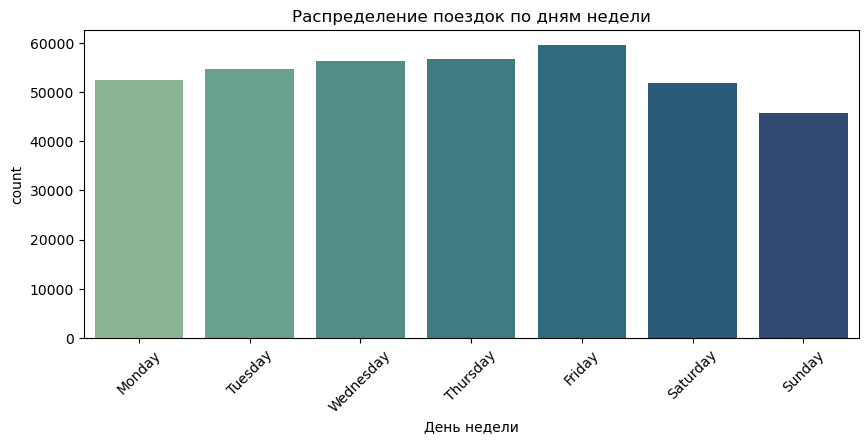

In [101]:
df['День недели'] = pd.to_datetime(df['Дата и время начала поездки']).dt.day_name()
plt.figure(figsize=(10,4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='День недели', data=df, order=order, palette='crest')
plt.title('Распределение поездок по дням недели')
plt.xticks(rotation=45)
plt.show()

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/2593405038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette='flare')


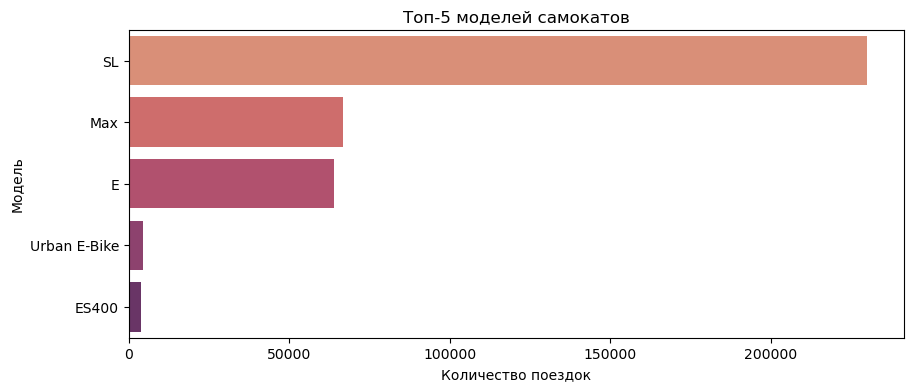

In [102]:
plt.figure(figsize=(10,4))
top_models = df['Название модели самоката'].value_counts().head(5)
sns.barplot(x=top_models.values, y=top_models.index, palette='flare')
plt.title('Топ-5 моделей самокатов')
plt.xlabel('Количество поездок')
plt.ylabel('Модель')
plt.show()

In [103]:
print('Средний чек (руб):', round(df['Стоимость поездки'].mean(), 1))
print('Средний кэшбэк (руб):', round(df['Кэшбэк в рублях'].mean(), 1))

Средний чек (руб): 120.2
Средний кэшбэк (руб): 31.5


/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_80349/3575948844.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='mako')


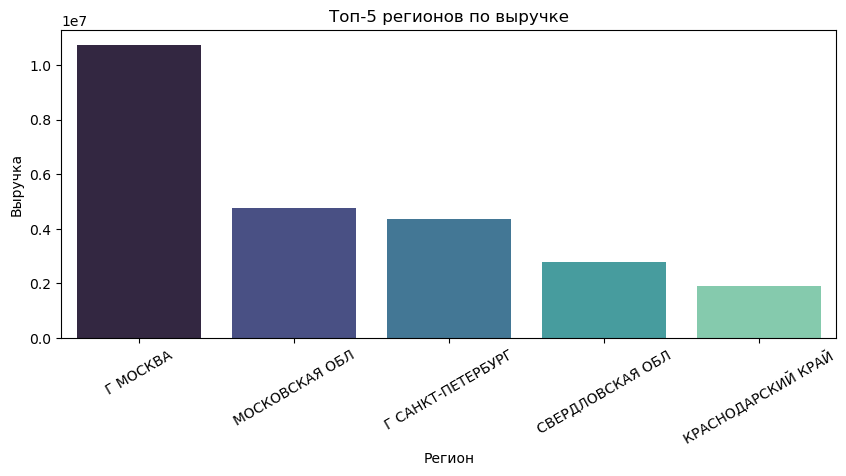

In [116]:


# Топ-5 регионов по выручке
region_revenue = df.groupby('Область')['Стоимость поездки'] \
                   .sum() \
                   .sort_values(ascending=False) \
                   .head(5)

plt.figure(figsize=(10,4))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='mako')

plt.title('Топ-5 регионов по выручке')
plt.ylabel('Выручка')
plt.xlabel('Регион')
plt.xticks(rotation=30)  # чуть повернуть подписи для читаемости
plt.show()


# Экономический сектор

In [262]:
revenue_per_user = df.groupby('Индификатор клиента')['Стоимость поездки'].sum().mean()
print('Средняя выручка на пользователя (руб):', round(revenue_per_user, 1))

Средняя выручка на пользователя (руб): 749.0


In [104]:
share_with_cashback = (df['Кэшбэк в рублях'] > 0).mean()
print(f'Доля поездок с кэшбэком: {share_with_cashback:.2%}')

Доля поездок с кэшбэком: 93.35%


In [105]:
region_revenue = df.groupby('Область')['Стоимость поездки'].sum().sort_values(ascending=False).head(5)
print('Топ-5 регионов по выручке:')
print(region_revenue)

Топ-5 регионов по выручке:
Область
Г МОСКВА              10745418.07
МОСКОВСКАЯ ОБЛ         4767711.01
Г САНКТ-ПЕТЕРБУРГ      4368358.76
СВЕРДЛОВСКАЯ ОБЛ       2796252.14
КРАСНОДАРСКИЙ КРАЙ     1903467.37
Name: Стоимость поездки, dtype: float64


In [107]:
# Проверка на дурака 
print((df['Кэшбэк в рублях'] < 0).any())
print(df[df['Кэшбэк в рублях'] < 0])

False
Empty DataFrame
Columns: [Индификатор поездки, Индификатор клиента, Пол клиента, Возраст, Уровень образования, Семейный статус, Область, Стоимость минуты, Старт аренды, Размер замороженных средств, Название модели самоката, Километраж поездки, Дата и время создания заказа, Дата и время начала поездки, Дата и время окончания поездки, Часовой пояс, Местное время начала поездки, Стоимость поездки, Кэшбэк в рублях, Дата, Длительность поездки, Час, День недели]
Index: []

[0 rows x 23 columns]


# **Выводы**

### Основные выводы

#### 1. **Демографические характеристики пользователей**
   - **Возраст**: 
     - Распределение возрастов показывает, что основная аудитория — молодые люди (мода около 20–30 лет или поколение Z).
     - Средний возраст ~25–30 лет (смотреть график)
     - Минимальный возраст — 18 лет (из-за ограничения сервиса), максимальный — выше 40-50, но пожилые пользователи редки.
   - **Пол**:
     - Мужчины гораздо чаще пользуются самокатом: ~70–80% поездок 
   - **Семейный статус**:
     - Преобладают UNM (unmarried, холостые) и MAR (married, женатые). DIV (divorced, разведённые) — меньшинство.
       Это коррелирует с молодым возрастом аудитории.
   - **Регионы**:
     - Топ-регионы по количеству поездок: Москва (Г МОСКВА), Московская область, Санкт-Петербург, Свердловская область,
       Краснодарский край (см график топ-10 регионов)
     - Сервис популярен в крупных городах и мегаполисах, где развита инфраструктура, довольно очевидный вывод 

   **Подвывод**: Аудитория — преимущественно молодые мужчины из крупных городов, студенты или недавние выпускники.
      Это предполагает фокус маркетинга на урбанизированной молодёжи 
      (например, студенческие кампании, интеграция с общественным транспортом) 



#### 2. **Характеристики поездок**
   - **Длительность и расстояние**:
     - Средняя длительность поездки: ~7–13 минут (график распределения, пик на коротких поездках)
     - Среднее расстояние: ~1–3 км (график километража, большинство поездок короткие, до 5 км).
     Большинство поездок — короткие и быстрые, что указывает на использование         самокатов для работы или дома или метро 
   - **Время начала поездок**:
     - Пиковые часы: утро (5–7 ч) и вечер (15–16 ч), что совпадает с часами пик в городах 
   - **Стоимость и старт аренды**:
     - Стоимость минуты: варьируется от 6.5 до 8.2 (средняя ~7.6 руб.).
     - Старт аренды: фиксированные 30 или 50 руб
     - Замороженные средства: всегда 300 руб

   **Вывод**: Поездки преимущественно короткие и утилитарные, те сервис удобен для ежедневных перемещений в городе,
     но длинные поездки редки —       возможно, из-за стоимости или ограничений батареи.

#### 3. **Экономические показатели**
   - **Средний чек и кэшбэк**:
     - Средний чек за поездку: 120.2 руб.
     - Средний кэшбэк: 31.5 руб. (в рублях; бонусы в NaN — возможно, не используются).
     - Доля поездок с кэшбэком: 93.35% (почти все поездки дают возврат, что стимулирует лояльность).
   - **Выручка**:
     - Средняя выручка на пользователя: 749  руб. 
     - Топ-5 регионов по выручке (в рублях):
      1.  Г МОСКВА              10745418.07
      2. МОСКОВСКАЯ ОБЛ         4767711.01
      3. Г САНКТ-ПЕТЕРБУРГ      4368358.76
      4. СВЕРДЛОВСКАЯ ОБЛ       2796252.14
      5. КРАСНОДАРСКИЙ КРАЙ     1903467.37
     - Москва и область — основной источник дохода (~половина от топ-5).

   **Вывод**: Сервис прибыльный в крупных регионах, но средний чек низкий из-за коротких поездок. Кэшбэк — эффективный инструмент удержания (94% покрытия), но снижает чистую прибыль (~25% от чека возвращается). Рекомендуется расширять в топ-регионах и стимулировать более длинные поездки для роста выручки


#### Общие рекомендации на основе анализа
- **Маркетинг**: Фокус на молодых мужчин в мегаполисах. Кампании для увеличения доли женщин и старших возрастов (например, скидки для семей).
- **Операции**: Оптимизировать парк самокатов в пиковые часы и топ-регионах. Внедрить стимулы для длинных поездок (скидки на минуты после 10 мин).
- **Экономика**: Кэшбэк работает на удержание, но мониторить маржу. Расширение в регионы вроде Краснодарского края для диверсификации.

# **Гипотеза 1:** 

### Введение прогрессивной скидки на минуты после 10 мин поездки.

Предполагается, что это увеличит среднюю длительность поездки на 20% и выручку на 15%, так как данные показывают преобладание коротких поездок (<15 мин), и пользователи могут быть мотивированы ездить дальше без роста стоимости. (цифры взяты из головы)

Метрики по группам:
       Avg_Duration    Avg_Cost  Num_Rides
Group                                     
A          8.985536  116.989942      44697
B         10.821203  130.096345      41878

T-test для длительности: t-stat = 32.36, p-value = 0.0000
T-test для стоимости: t-stat = 33.53, p-value = 0.0000
Разница в длительности статистически значима (p < 0.05).
Разница в стоимости статистически значима (p < 0.05).


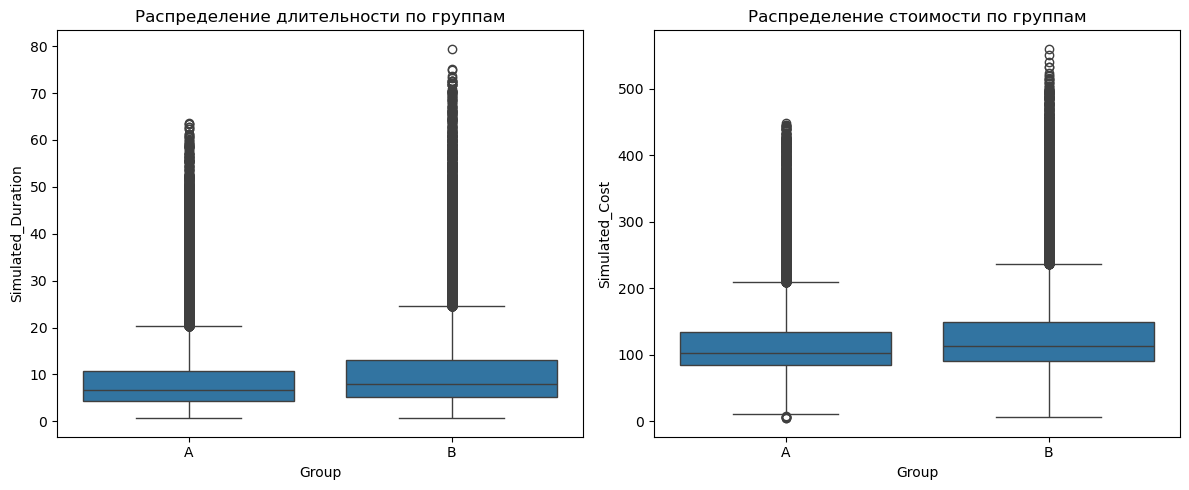

In [108]:
df = df.copy()
df = df.dropna(subset=['Дата и время начала поездки', 'Дата и время окончания поездки', 'Стоимость минуты', 'Старт аренды', 'Стоимость поездки', 'Индификатор клиента', 'Область'])

# Вычисление длительности поездки в минутах
df['ride_start_dttm'] = pd.to_datetime(df['Дата и время начала поездки'])
df['ride_end_dttm'] = pd.to_datetime(df['Дата и время окончания поездки'])
df['Длительность поездки'] = (df['ride_end_dttm'] - df['ride_start_dttm']).dt.total_seconds() / 60

df = df[df['Длительность поездки'] > 0] # проверка на дурака 

# Фильтр на регион Москва для теста 
df_moscow = df[df['Область'] == 'Г МОСКВА'].copy()

# Рандомизация пользователей на группы A и B
unique_users = df_moscow['Индификатор клиента'].dropna().unique()
np.random.seed(42)
np.random.shuffle(unique_users)
split_point = len(unique_users) // 2
group_a_users = set(unique_users[:split_point])
group_b_users = set(unique_users[split_point:])

df_moscow['Group'] = df_moscow['Индификатор клиента'].apply(lambda x: 'A' if x in group_a_users else 'B')

# Симуляция поведения для группы B (рост длительности на 20% с шумом)
def simulate_tiered_pricing(row):
    duration = row['Длительность поездки']
    minute_price = row['Стоимость минуты']
    start_price = row['Старт аренды']
    if row['Group'] == 'B':
        growth_factor = np.random.normal(1.20, 0.05)
        duration = duration * growth_factor
    if duration > 10:
        cost = start_price + (10 * minute_price) + ((duration - 10) * minute_price * 0.8)
    else:
        cost = start_price + (duration * minute_price)
    return pd.Series([duration, cost])

df_moscow[['Simulated_Duration', 'Simulated_Cost']] = df_moscow.apply(simulate_tiered_pricing, axis=1)

# Расчёт метрик
metrics = df_moscow.groupby('Group').agg({
    'Simulated_Duration': 'mean',
    'Simulated_Cost': 'mean',
    'Индификатор поездки': 'count'
}).rename(columns={
    'Simulated_Duration': 'Avg_Duration',
    'Simulated_Cost': 'Avg_Cost',
    'Индификатор поездки': 'Num_Rides'
})

print("Метрики по группам:")
print(metrics)

# Статистический тест 
group_a = df_moscow[df_moscow['Group'] == 'A']
group_b = df_moscow[df_moscow['Group'] == 'B']

t_stat_duration, p_value_duration = stats.ttest_ind(group_b['Simulated_Duration'], group_a['Simulated_Duration'], equal_var=False)
t_stat_cost, p_value_cost = stats.ttest_ind(group_b['Simulated_Cost'], group_a['Simulated_Cost'], equal_var=False)

print(f"\nT-test для длительности: t-stat = {t_stat_duration:.2f}, p-value = {p_value_duration:.4f}")
print(f"T-test для стоимости: t-stat = {t_stat_cost:.2f}, p-value = {p_value_cost:.4f}")

if p_value_duration < 0.05:
    print("Разница в длительности статистически значима (p < 0.05).")
else:
    print("Разница в длительности не значима.")

if p_value_cost < 0.05:
    print("Разница в стоимости статистически значима (p < 0.05).")
else:
    print("Разница в стоимости не значима.")

# Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Simulated_Duration', data=df_moscow)
plt.title('Распределение длительности по группам')

plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='Simulated_Cost', data=df_moscow)
plt.title('Распределение стоимости по группам')

plt.tight_layout()
plt.show()

# **Гипотеза 2:**

### Персонализированные push-уведомления с скидками для пользователей старше 30 лет. Ожидаем рост использования среди этой группы на 30%, поскольку EDA показывает низкую активность старших возрастов, а уведомления на основе демографии (возраст, регион) повысят вовлечённость

Метрики по группам:
       Avg_Num_Rides  Num_Users  Total_Rides
Group                                       
A           5.908485      14861        87806
B           7.318194      14862       108763

T-test для количества поездок: t-stat = 7.95, p-value = 0.0000
Разница в количестве поездок статистически значима (p < 0.05).


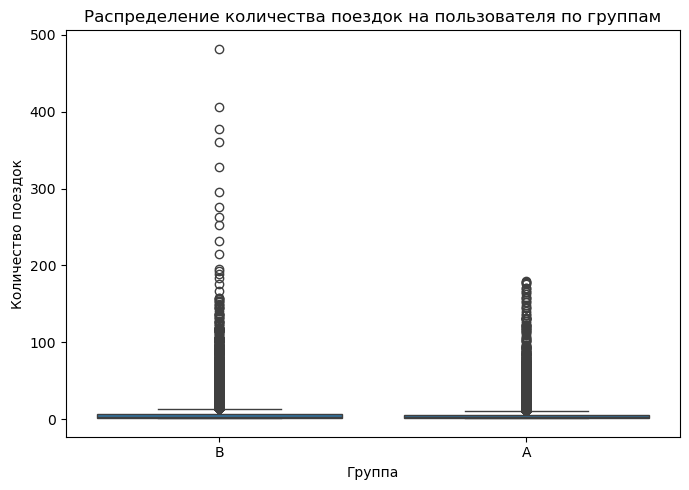

In [109]:
# Фильтр на пользователей старше 30 лет (целевая группа для гипотезы)
df_over_30 = df[df['Возраст'] > 30].copy()

# Рандомизация пользователей на группы A и B
unique_users = df_over_30['Индификатор клиента'].unique()
np.random.seed(42)
np.random.shuffle(unique_users)
split_point = len(unique_users) // 2
group_a_users = unique_users[:split_point]
group_b_users = unique_users[split_point:]

df_over_30['Group'] = np.where(df_over_30['Индификатор клиента'].isin(group_a_users), 'A', 'B')

# Шаг 4: Симуляция эффекта push-уведомлений для группы B (+30% поездок, скидка 20%)
simulated_df = df_over_30.copy()
additional_rides = []

for user in group_b_users:
    user_data = df_over_30[df_over_30['Индификатор клиента'] == user]
    current_rides = len(user_data)
    additional_count = int(current_rides * 0.30)
    if additional_count > 0:
        for _ in range(additional_count):
            new_ride = user_data.sample(1).copy()
            new_ride['Индификатор поездки'] = -1
            new_ride['Стоимость поездки'] *= 0.8
            additional_rides.append(new_ride)

if additional_rides:
    additional_df = pd.concat(additional_rides, ignore_index=True)
    simulated_df = pd.concat([simulated_df, additional_df], ignore_index=True)

# Метрики
sim_user_rides = simulated_df.groupby(['Индификатор клиента', 'Group'])['Индификатор поездки'].count().reset_index()
sim_user_rides.rename(columns={'Индификатор поездки': 'Sim_Num_Rides'}, inplace=True)

metrics = sim_user_rides.groupby('Group').agg({
    'Sim_Num_Rides': 'mean'
}).rename(columns={'Sim_Num_Rides': 'Avg_Num_Rides'})
metrics['Num_Users'] = sim_user_rides['Group'].value_counts()
metrics['Total_Rides'] = sim_user_rides.groupby('Group')['Sim_Num_Rides'].sum()

print("Метрики по группам:")
print(metrics)

# Статистический тест
group_a_rides = sim_user_rides[sim_user_rides['Group'] == 'A']['Sim_Num_Rides']
group_b_rides = sim_user_rides[sim_user_rides['Group'] == 'B']['Sim_Num_Rides']
t_stat, p_value = stats.ttest_ind(group_b_rides, group_a_rides)

print(f"\nT-test для количества поездок: t-stat = {t_stat:.2f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Разница в количестве поездок статистически значима (p < 0.05).")
else:
    print("Разница в количестве поездок не значима.")

# Шаг 7: Визуализация (корректно через seaborn)
plt.figure(figsize=(7, 5))
sns.boxplot(x='Group', y='Sim_Num_Rides', data=sim_user_rides)
plt.title('Распределение количества поездок на пользователя по группам')
plt.xlabel('Группа')
plt.ylabel('Количество поездок')
plt.tight_layout()
plt.show()

# **Гипотеза 3:** 

### Интеграция геймификации (бейджи и бонусы за серию поездок).
Это должно увеличить retention rate на 25%, так как данные указывают на низкую повторяемость (средняя выручка на пользователя 686 руб., ~6 поездок), а геймификация стимулирует лояльность.

Метрики по группам:
       Avg_Active_Days  Avg_Num_Rides
Group                                
A             4.457536       6.271980
B             5.704516       7.542371

T-test для retention (активных дней): t-stat = 14.93, p-value = 0.0000
Разница в retention статистически значима (p < 0.05).


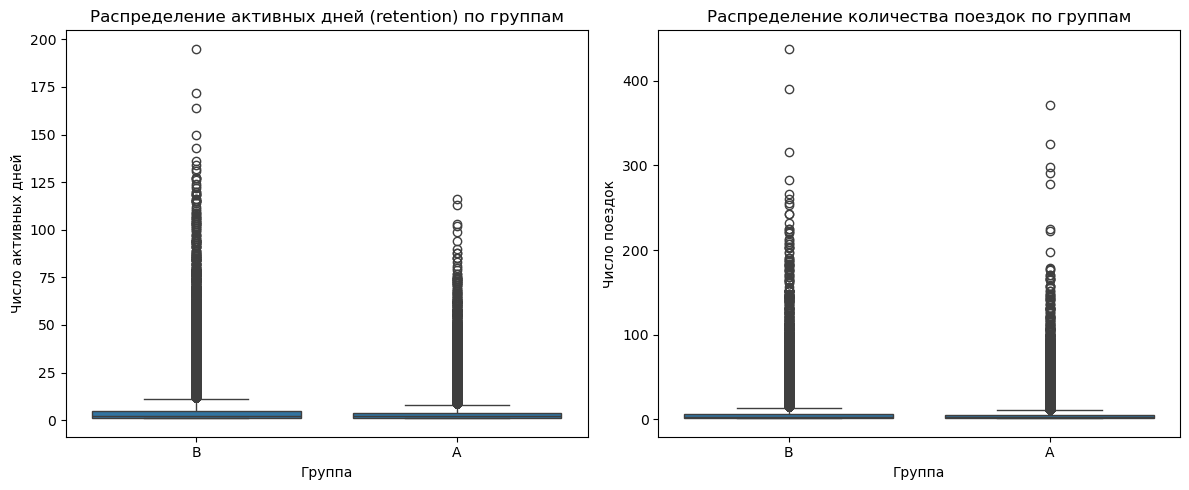

In [112]:
# Добавляем дату поездки для расчёта retention (используем дату начала поездки)
df['ride_start_dttm'] = pd.to_datetime(df['Дата и время начала поездки'])
df['Ride_Date'] = df['ride_start_dttm'].dt.date

# Рандомизация всех пользователей на группы A и B 
unique_users = df['Индификатор клиента'].unique()
np.random.seed(42)  # Для воспроизводимости
np.random.shuffle(unique_users)
split_point = len(unique_users) // 2
group_a_users = unique_users[:split_point]
group_b_users = unique_users[split_point:]

# Добавляем столбец группы
df['Group'] = np.where(df['Индификатор клиента'].isin(group_a_users), 'A', 'B')

# Симуляция эффекта геймификации для группы B
user_activity = df.groupby(['Индификатор клиента', 'Group']).agg({
    'Ride_Date': ['nunique', 'min', 'max'],
    'Индификатор поездки': 'count'
}).reset_index()
user_activity.columns = ['Индификатор клиента', 'Group', 'Active_Days', 'First_Date', 'Last_Date', 'Num_Rides']

simulated_df = df.copy()
additional_rides = []

for user in group_b_users:
    user_data = df[df['Индификатор клиента'] == user]
    current_rides = len(user_data)
    additional_count = int(current_rides * 0.25)
    if additional_count > 0:
        last_date = user_data['Ride_Date'].max()
        for i in range(additional_count):
            new_ride = user_data.sample(1).copy()
            new_ride['Индификатор поездки'] = -1
            new_ride['Ride_Date'] = last_date + pd.Timedelta(days=i+1)
            new_ride['ride_start_dttm'] = pd.to_datetime(new_ride['Ride_Date'])
            new_ride['Стоимость поездки'] *= 0.9
            additional_rides.append(new_ride)

if additional_rides:
    additional_df = pd.concat(additional_rides, ignore_index=True)
    simulated_df = pd.concat([simulated_df, additional_df], ignore_index=True)

# Шаг 4: Пересчёт метрик после симуляции
sim_user_activity = simulated_df.groupby(['Индификатор клиента', 'Group']).agg({
    'Ride_Date': 'nunique',
    'Индификатор поездки': 'count'
}).reset_index()
sim_user_activity.rename(columns={'Ride_Date': 'Sim_Active_Days', 'Индификатор поездки': 'Sim_Num_Rides'}, inplace=True)

metrics = sim_user_activity.groupby('Group').agg({
    'Sim_Active_Days': 'mean',
    'Sim_Num_Rides': 'mean'
}).rename(columns={
    'Sim_Active_Days': 'Avg_Active_Days',
    'Sim_Num_Rides': 'Avg_Num_Rides'
})

print("Метрики по группам:")
print(metrics)

# Статистический тест
group_a_retention = sim_user_activity[sim_user_activity['Group'] == 'A']['Sim_Active_Days']
group_b_retention = sim_user_activity[sim_user_activity['Group'] == 'B']['Sim_Active_Days']
t_stat_ret, p_value_ret = stats.ttest_ind(group_b_retention, group_a_retention)

print(f"\nT-test для retention (активных дней): t-stat = {t_stat_ret:.2f}, p-value = {p_value_ret:.4f}")

if p_value_ret < 0.05:
    print("Разница в retention статистически значима (p < 0.05).")
else:
    print("Разница в retention не значима.")

# Визуализация 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Sim_Active_Days', data=sim_user_activity)
plt.title('Распределение активных дней (retention) по группам')
plt.xlabel('Группа')
plt.ylabel('Число активных дней')

plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='Sim_Num_Rides', data=sim_user_activity)
plt.title('Распределение количества поездок по группам')
plt.xlabel('Группа')
plt.ylabel('Число поездок')

plt.tight_layout()
plt.show()